# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy
import math

# sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# deep learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import ReLU
import tensorflow as tf
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow.keras.layers import Input, Dense # базовый класс для задания и обучения нейронной сети

from tensorflow.keras.optimizers import SGD

In [6]:
from sklearn.preprocessing import OneHotEncoder

## Import DATA
Примечание: обосновать почему из датасета убираем первые 22 строчки из ноубука 2

In [7]:
df1 = pd.DataFrame(pd.read_excel('./data/X_bp.xlsx', index_col=0))
df2 = pd.DataFrame(pd.read_excel('./data/X_nup.xlsx', index_col=0))
df = pd.concat([df1, df2], join='inner', axis=1)
df = df[23:]
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
23                           2.587348       1953.274926   
24                           2.499918       1942.595777   
25                           2.046471       2037.631811   
26                           1.856476       2018.220332   
27                           3.305535       1917.907506   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
23              1136.596135                   137.627420   
24               901.519947                   146.252208   
25               707.570887                   101.617251   
26               836.294382                   135.401697   
27               478.286247                   105.786930   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
23                          22.344534                234.716883   
24                          23.081757                351.231874   
25                          23.146393                312.307205   
26                          26.435515                327.510377   
27                          17.874100                328.154579   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
23                       555.893453                             80.803222   
24                       864.725484                             76.178075   
25                       547.601219                             73.817067   
26                       150.961449                             77.210762   
27                       526.692159                             72.345709   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
23                      2587.342983               246.613117   
24                      3705.672523               226.222760   
25                      2624.026407               178.198556   
26                      2473.187195               123.344561   
27                      3059.032991               275.575880   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
23                

In [8]:
Y = df['Соотношение матрица-наполнитель']
Y_1 = df['Модуль упругости при растяжении, ГПа']
Y_2 = df['Прочность при растяжении, МПа']
df_ = df.drop('Соотношение матрица-наполнитель', axis=1)
df_1 = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
df_2 = df.drop(['Прочность при растяжении, МПа'], axis=1)

In [9]:
df_copy = df.copy()
df = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)

In [10]:
df_copy.corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.011033   
модуль упругости, ГПа                                        0.032246   
Количество отвердителя, м.%                                 -0.017575   
Содержание эпоксидных групп,%_2                              0.027885   
Температура вспышки, С_2                                    -0.011712   
Поверхностная плотность, г/м2                               -0.011906   
Модуль упругости при растяжении, ГПа                        -0.017502   
Прочность при растяжении, МПа                                0.036288   
Потребление смолы, г/м2                                      0.078841   
Угол нашивки, град                                          -0.031401   
Шаг нашивки                                                  0.028404   
Плотность нашивки                                           -0.005432   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.011033               0.032246   
Плотность, кг/м3                              1.000000              -0.017544   
модуль упругости, ГПа                        -0.017544               1.000000   
Количество отвердителя, м.%                  -0.032137               0.023490   
Содержание эпоксидных групп,%_2              -0.011680              -0.006186   
Температура вспышки, С_2                     -0.018260               0.031181   
Поверхностная плотность, г/м2                 0.038236              -0.017841   
Модуль упругости при растяжении, ГПа         -0.020699               0.014482   
Прочность при растяжении, МПа                -0.074165               0.048217   
Потребление смолы, г/м2                      -0.027946              -0.007369   
Угол нашивки, град                           -0.065604              -0.020399   
Шаг нашивки                                  -0.057841              -0.007003   
Плотность нашивки                             0.082868               0.062844   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.017575   
Плотность, кг/м3                                        -0.032137   
модуль упругости, ГПа                                    0.023490   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.013484   
Температура вспышки, С_2                                 0.081562   
Поверхностная плотность, г/м2                            0.048636   
Модуль упругости при растяжении, ГПа                    -0.076936   
Прочность при растяжении, МПа                           -0.066785   
Потребление смолы, г/м2                                  0.008184   
Угол нашивки, град                                       0.040215   
Шаг нашивки                                              0.002655   
Плотность нашивки                                        0.019772   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.027885   
Плотность, кг/м3                                            -0.011680   
модуль упругости, ГПа                                       -0.006186   
Количество отвердителя, м.%                                  0.013484   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.008072   
Поверхностная плотность, г/м2                               -0.007685   
Модуль упругости при растяжении, ГПа                         0.064757   
Прочность при растяжении, МПа                               -0.031613   
Потребление смолы, г/м2                                      0.015057   
Угол нашивки, град                                           0.008400   
Шаг нашивки                          

In [11]:
df.corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                         1.000000   
Плотность, кг/м3                                        0.011033   
модуль упругости, ГПа                                   0.032246   
Количество отвердителя, м.%                            -0.017575   
Содержание эпоксидных групп,%_2                         0.027885   
Температура вспышки, С_2                               -0.011712   
Поверхностная плотность, г/м2                          -0.011906   
Потребление смолы, г/м2                                 0.078841   
Угол нашивки, град                                     -0.031401   
Шаг нашивки                                             0.028404   
Плотность нашивки                                      -0.005432   

                                 Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель          0.011033               0.032246   
Плотность, кг/м3                         1.000000              -0.017544   
модуль упругости, ГПа                   -0.017544               1.000000   
Количество отвердителя, м.%             -0.032137               0.023490   
Содержание эпоксидных групп,%_2         -0.011680              -0.006186   
Температура вспышки, С_2                -0.018260               0.031181   
Поверхностная плотность, г/м2            0.038236              -0.017841   
Потребление смолы, г/м2                 -0.027946              -0.007369   
Угол нашивки, град                      -0.065604              -0.020399   
Шаг нашивки                             -0.057841              -0.007003   
Плотность нашивки                        0.082868               0.062844   

                                 Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                    -0.017575   
Плотность, кг/м3                                   -0.032137   
модуль упругости, ГПа                               0.023490   
Количество отвердителя, м.%                         1.000000   
Содержание эпоксидных групп,%_2                     0.013484   
Температура вспышки, С_2                            0.081562   
Поверхностная плотность, г/м2                       0.048636   
Потребление смолы, г/м2                             0.008184   
Угол нашивки, град                                  0.040215   
Шаг нашивки                                         0.002655   
Плотность нашивки                                   0.019772   

                                 Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                         0.027885   
Плотность, кг/м3                                       -0.011680   
модуль упругости, ГПа                                  -0.006186   
Количество отвердителя, м.%                             0.013484   
Содержание эпоксидных групп,%_2                         1.000000   
Температура вспышки, С_2                               -0.008072   
Поверхностная плотность, г/м2                          -0.007685   
Потребление смолы, г/м2                                 0.015057   
Угол нашивки, град                                      0.008400   
Шаг нашивки                                             0.012065   
Плотность нашивки                                      -0.044336   

                                 Температура вспышки, С_2  \
Соотношение матрица-наполнитель                 -0.011712   
Плотность, кг/м3                                -0.018260   
модуль упругости, ГПа                            0.031181   
Количество отвердителя, м.%                      0.081562   
Содержание эпоксидных групп,%_2                 -0.008072   
Температура вспышки, С_2                         1.000000   
Поверхностная плотность, г/м2                    0.015638   
Потребление смолы, г/м2                          0.061615   
Угол нашивки, град                               0.020632   
Шаг нашивки                                      0.018349   
Плотность нашивки                             

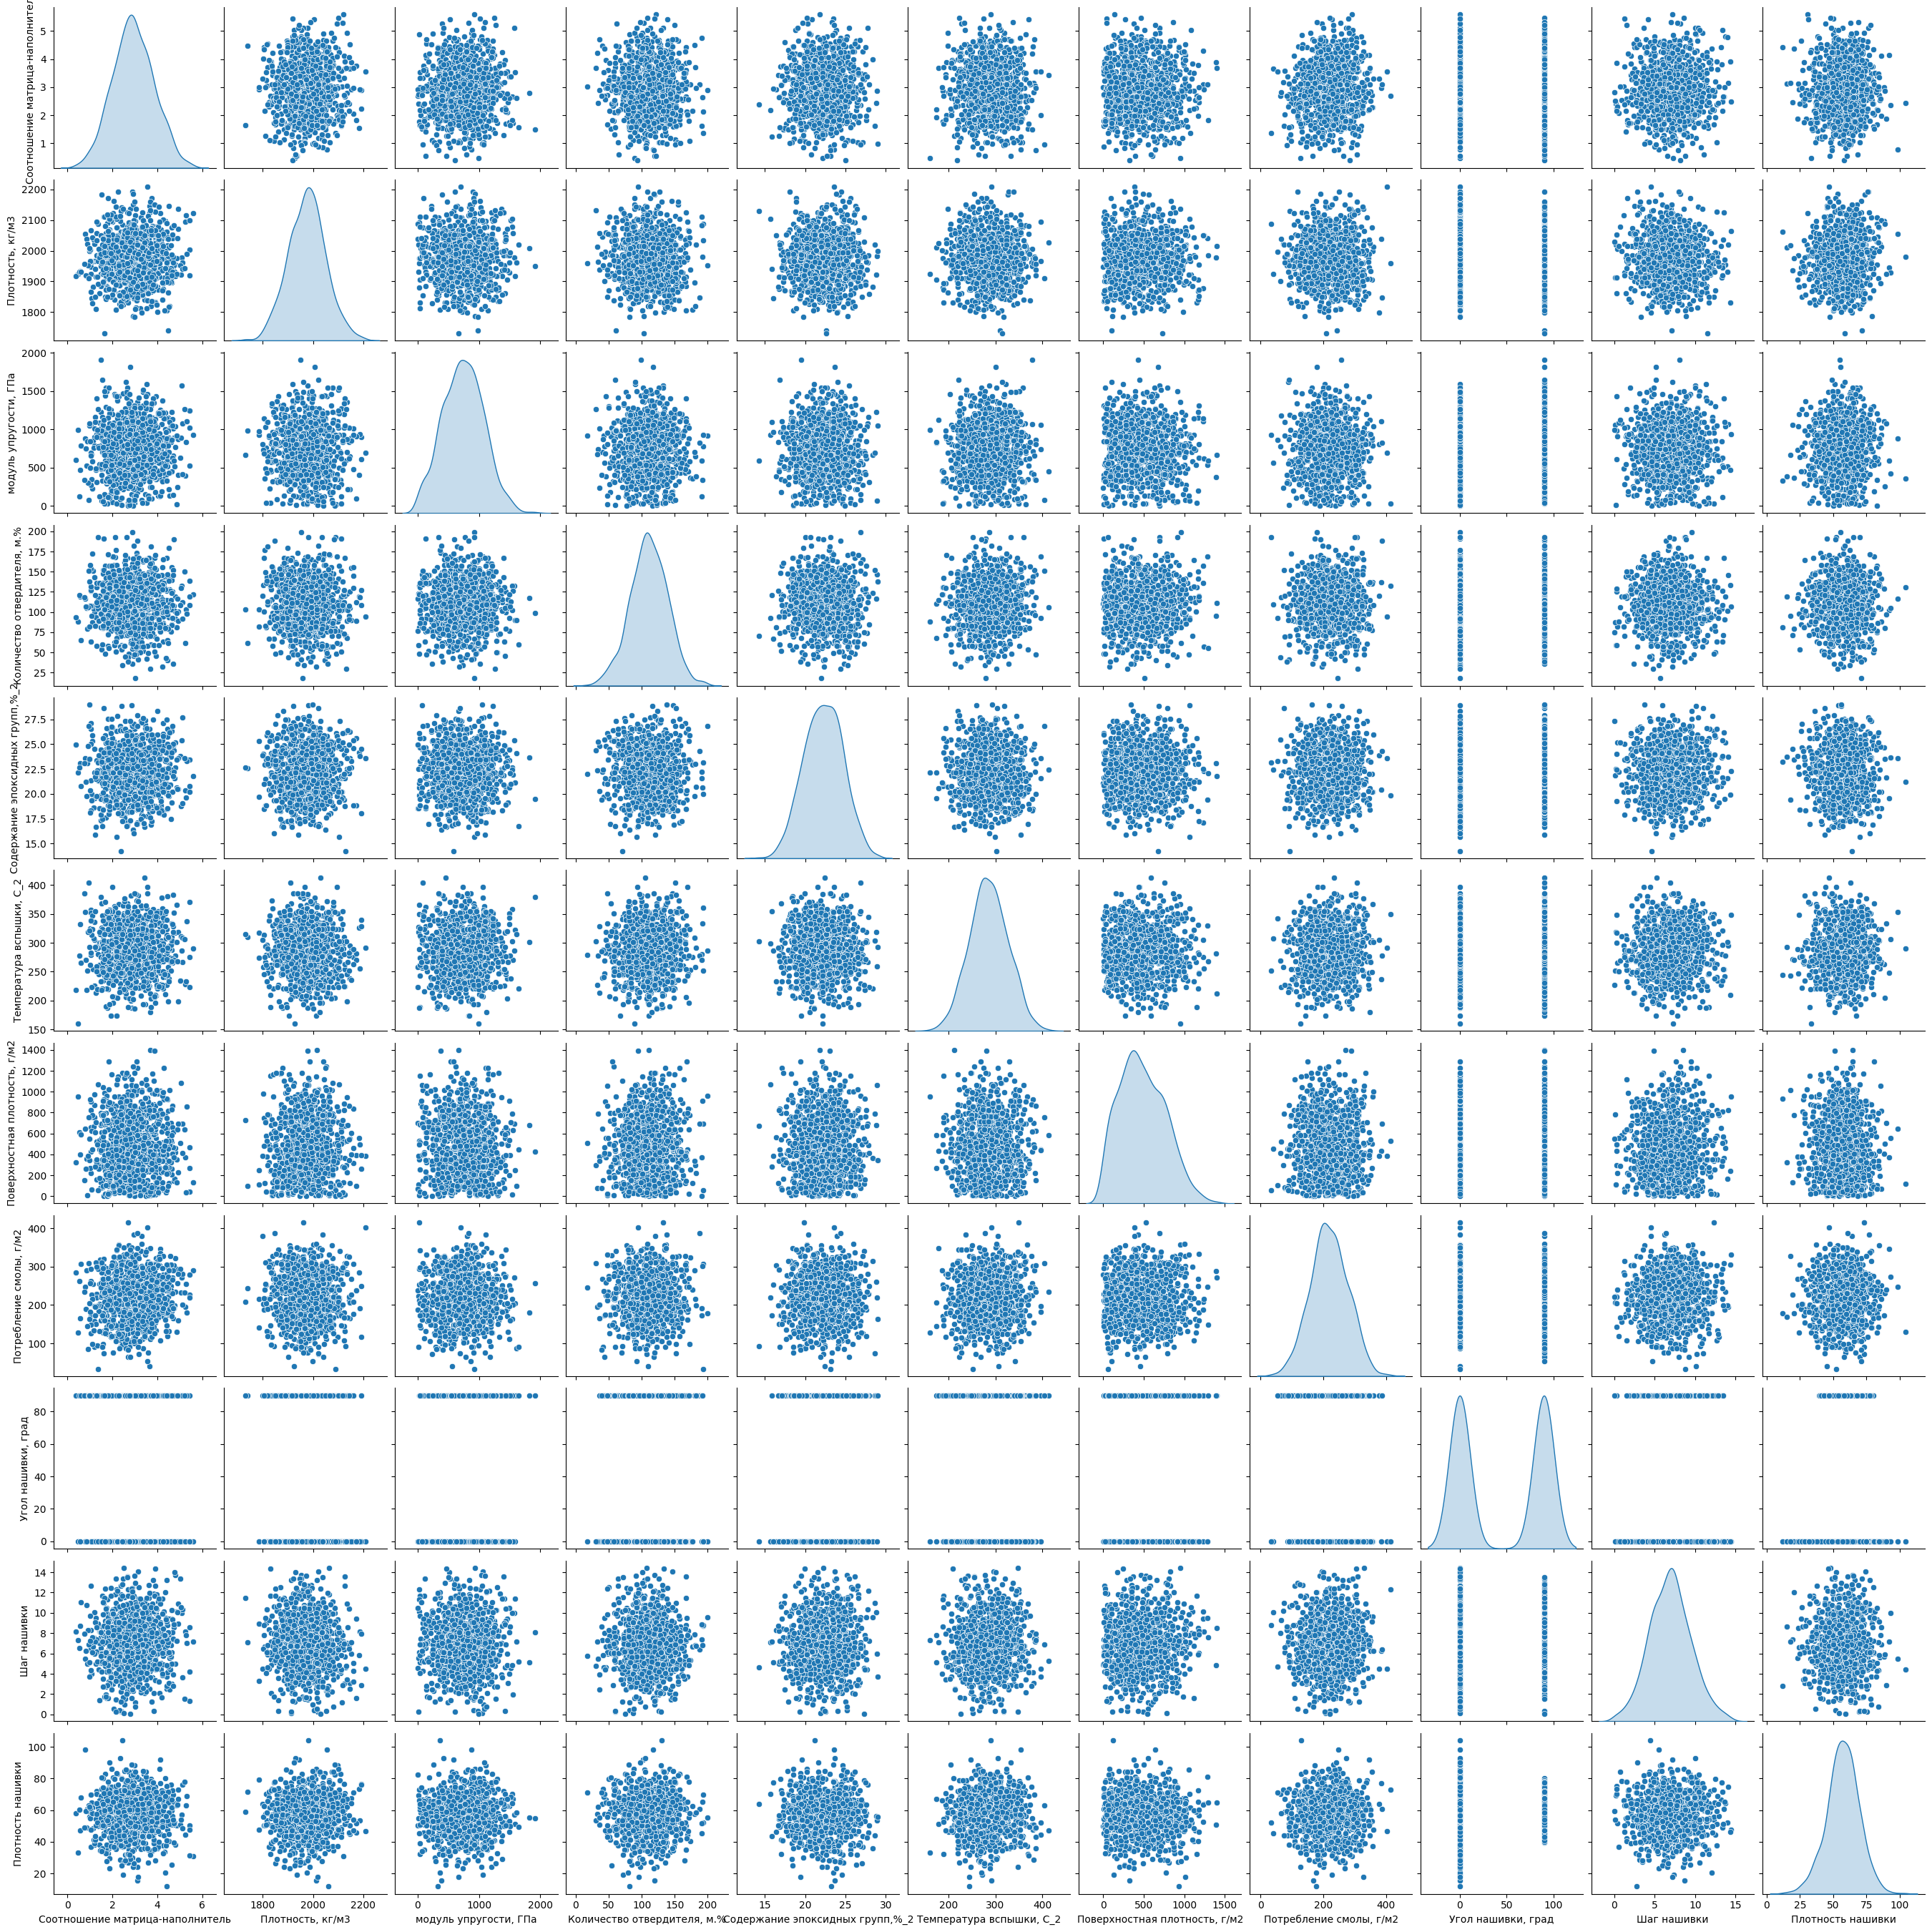

In [12]:
sns.pairplot(df, diag_kind='kde')

# Разобьем данные на кластеры

## Подбор оптимального количества кластеров

### Метод локтя для подбора оптимального количества кластеров

In [13]:
distortions = []
for i in range(1, 30):
    kmeans = KMeans(
        n_clusters=i, # На сколько кластеров поделить наш ДС
        init='random', # Начальная инициализация центров кластеров
        n_init=10, # Начальное колиечтво этих точек (центров класстеров)
        max_iter=300, # 
        tol=1e-04 # Величина изменения при сдвиге
    )
    kmeans_prediction = kmeans.fit_predict(df)
    distortions.append(kmeans.inertia_)

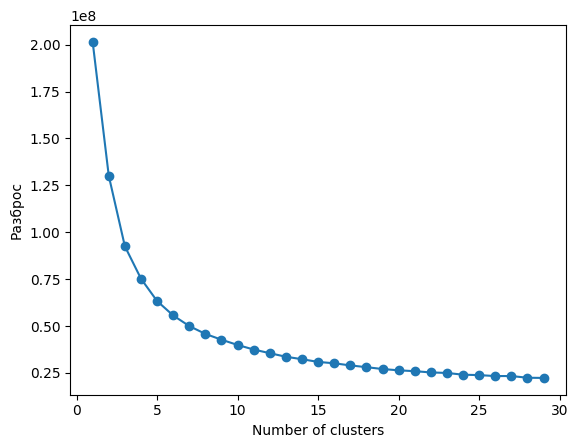

In [14]:
plt.plot(range(1,30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Разброс')
plt.show()

Оптимальным, с виду, колличеством класстеров является 15

### Для визуализации адекватности разбития данных будем использовать TSNE

In [15]:
tsne_clusters_number = TSNE(n_components=2, init='random').fit_transform(df)
tsne_clusters_number

array([[  6.735887  , -26.267153  ],
       [-18.444971  , -18.719389  ],
       [ -4.3387237 ,  -0.07071827],
       ...,
       [-25.26368   ,   9.102955  ],
       [-11.528266  ,  -5.7555532 ],
       [-25.111631  ,   7.423214  ]], dtype=float32)

### На основании вышеполученной информации, попроубем разбить данные на 8 класстеров

In [16]:
kmeans = KMeans(
    n_clusters=8, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

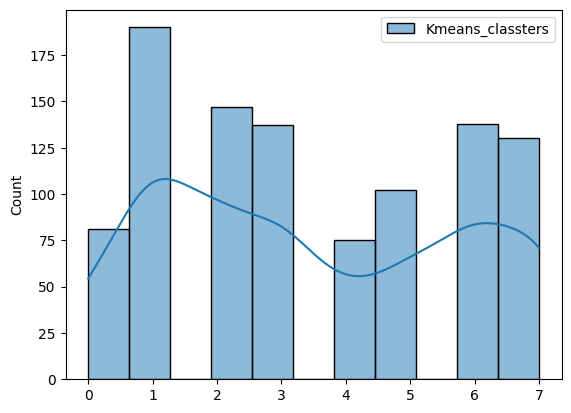

In [17]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

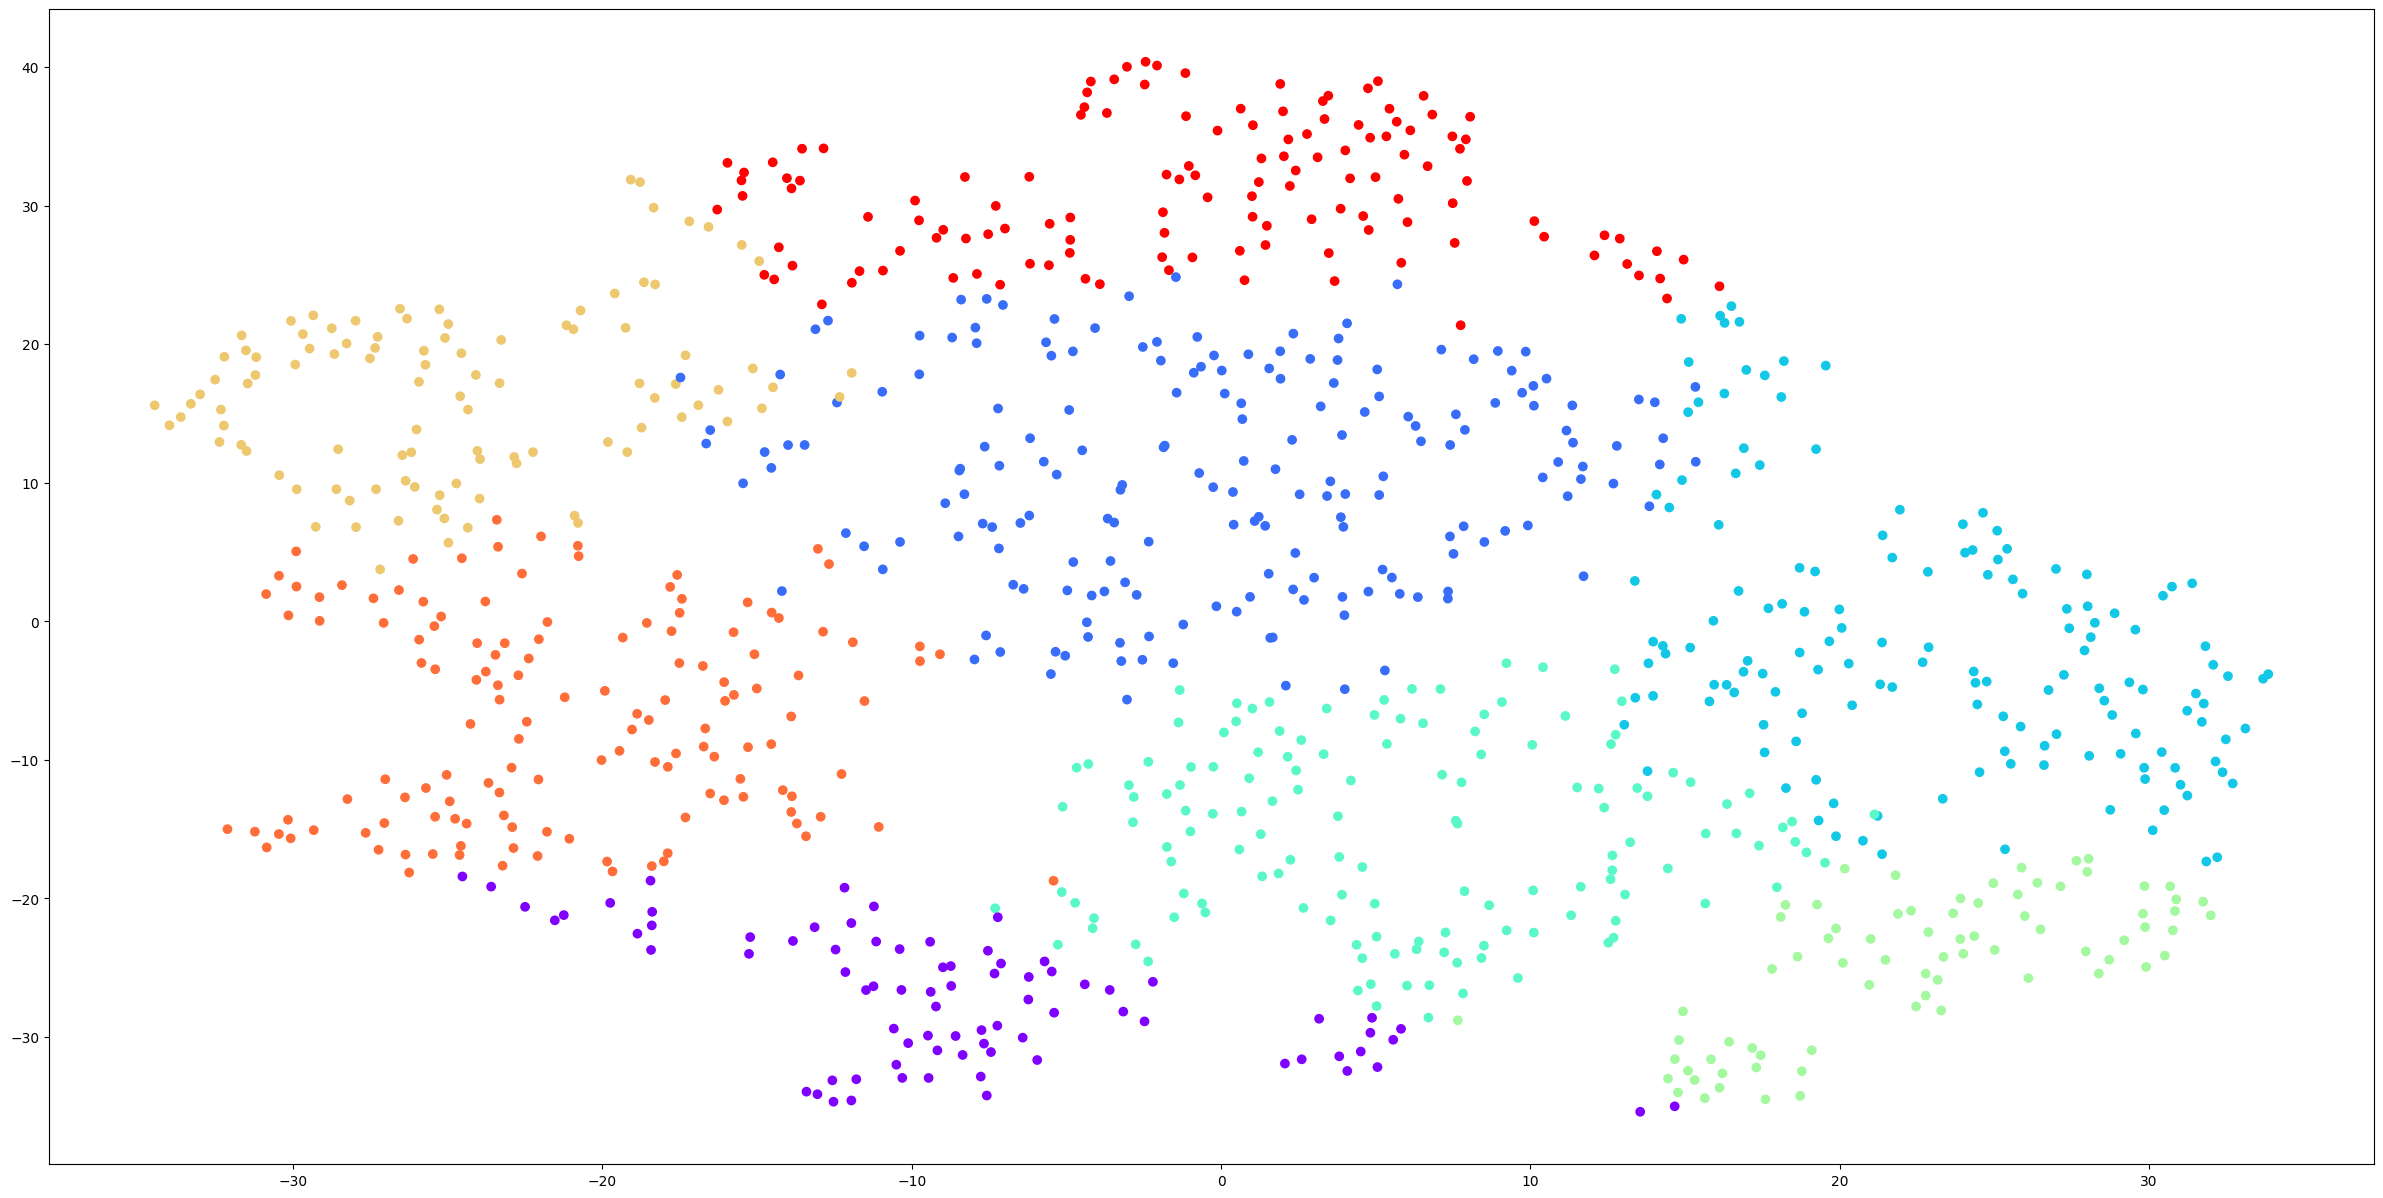

In [18]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 9 класстеров

In [19]:
kmeans = KMeans(
    n_clusters=9, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

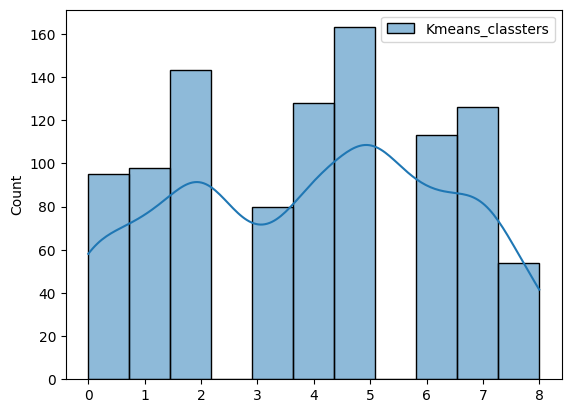

In [20]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

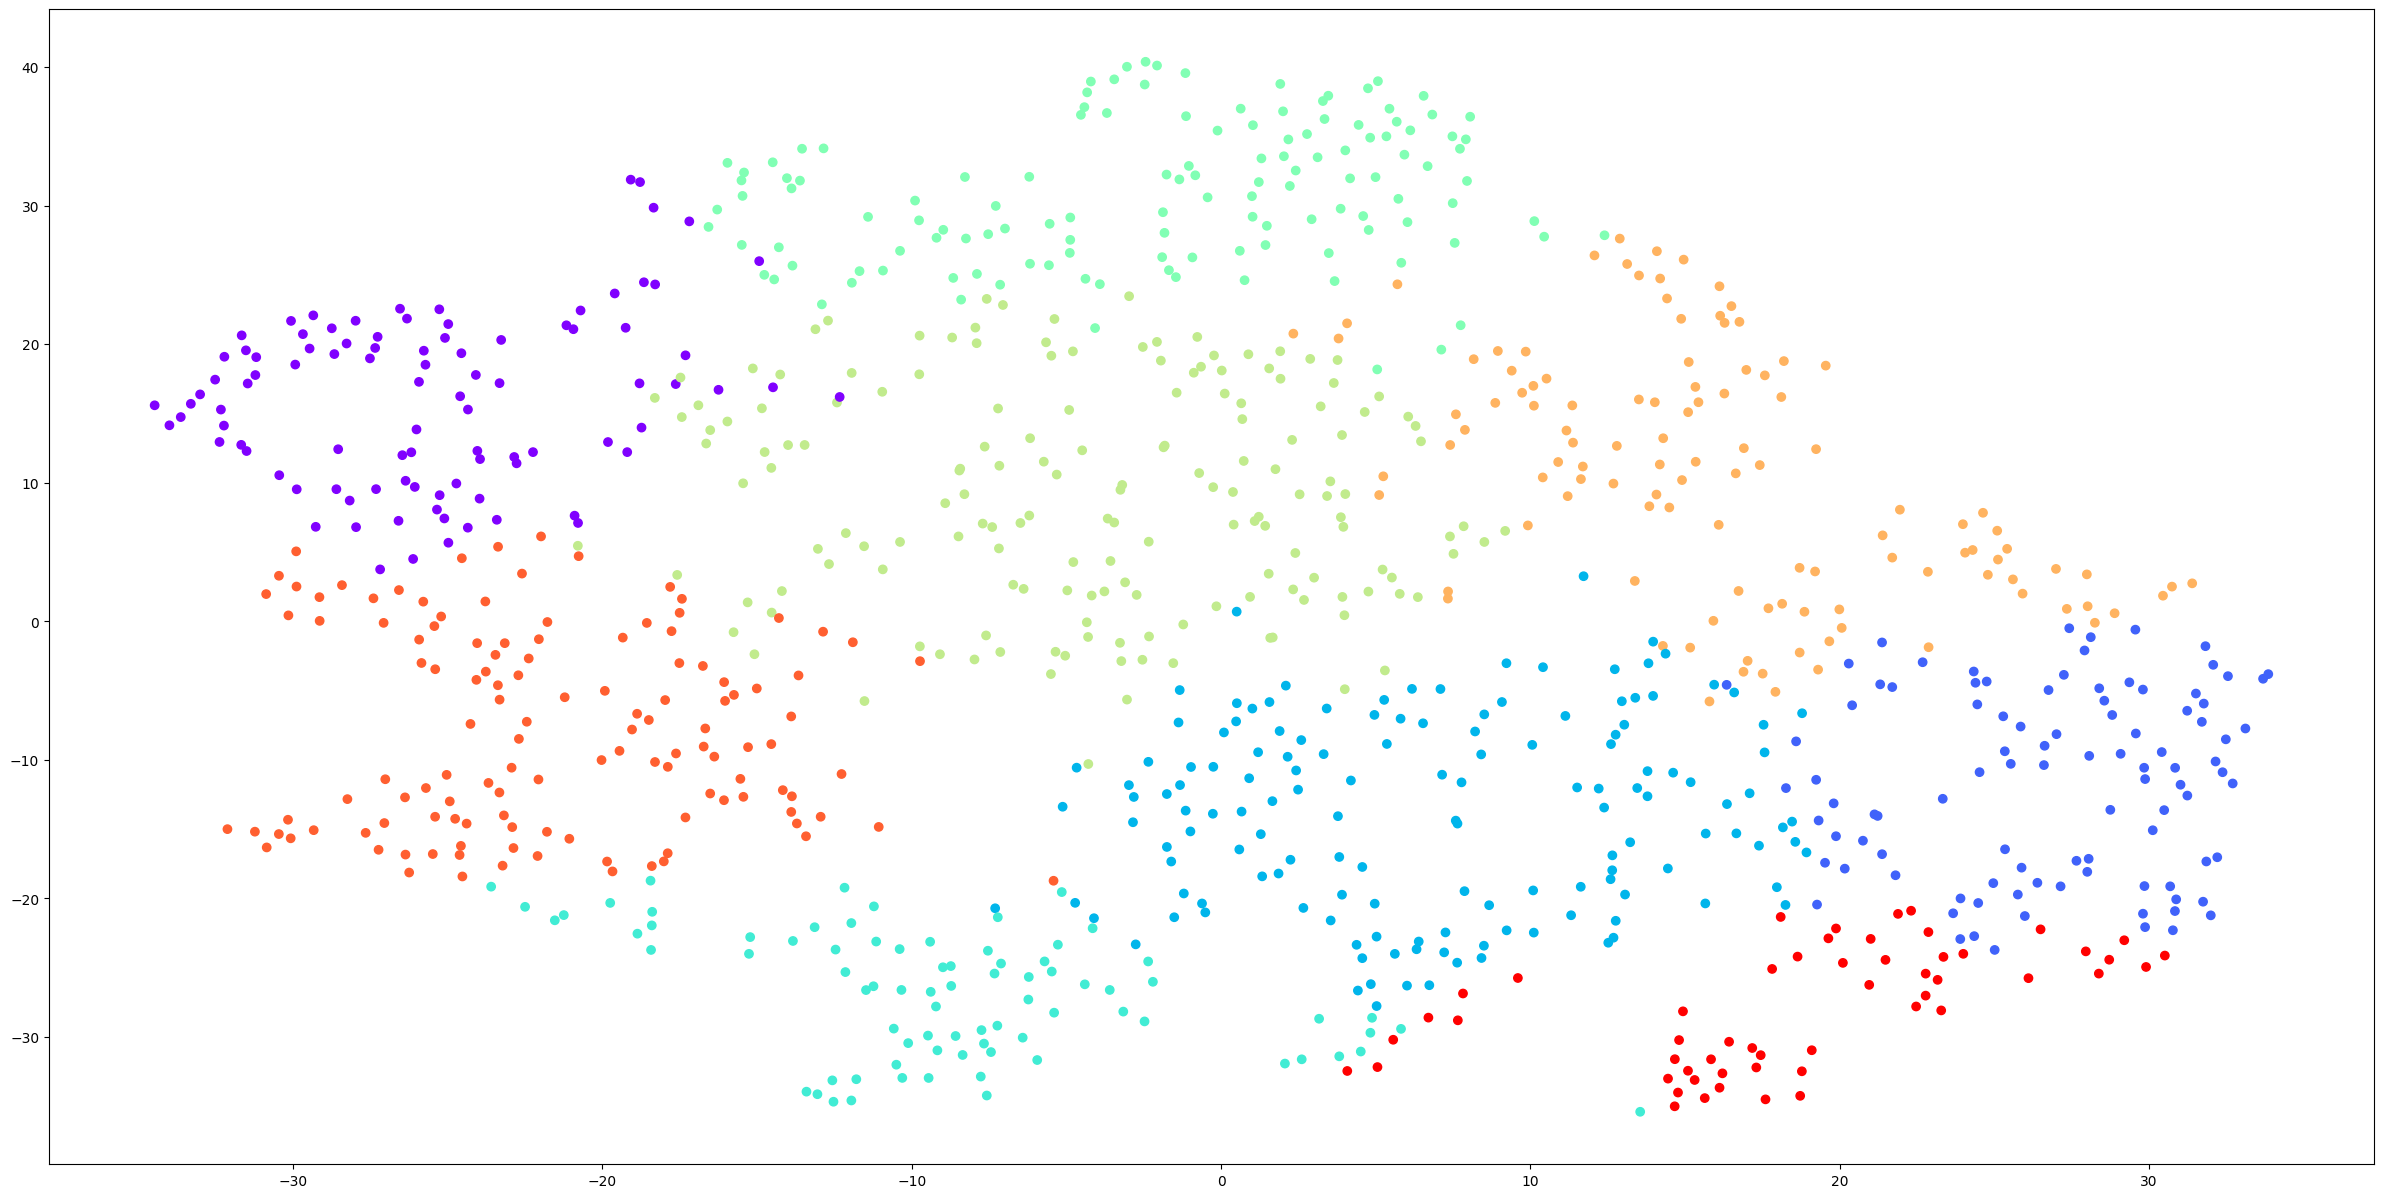

In [21]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

Как мы видим один из кластеров пустой, имеет смысл разбить на 8

### На основании вышеполученной информации, попроубем разбить данные на 10 класстеров

In [22]:
kmeans = KMeans(
    n_clusters=15, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

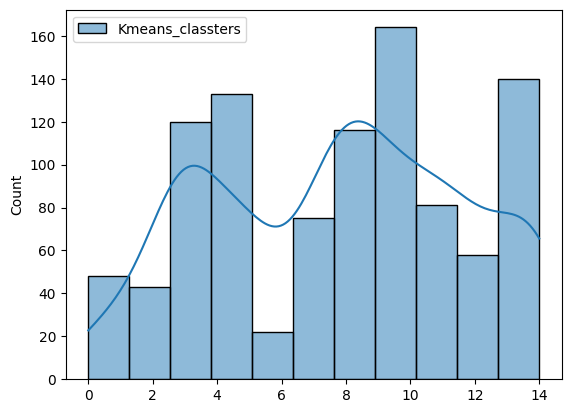

In [23]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

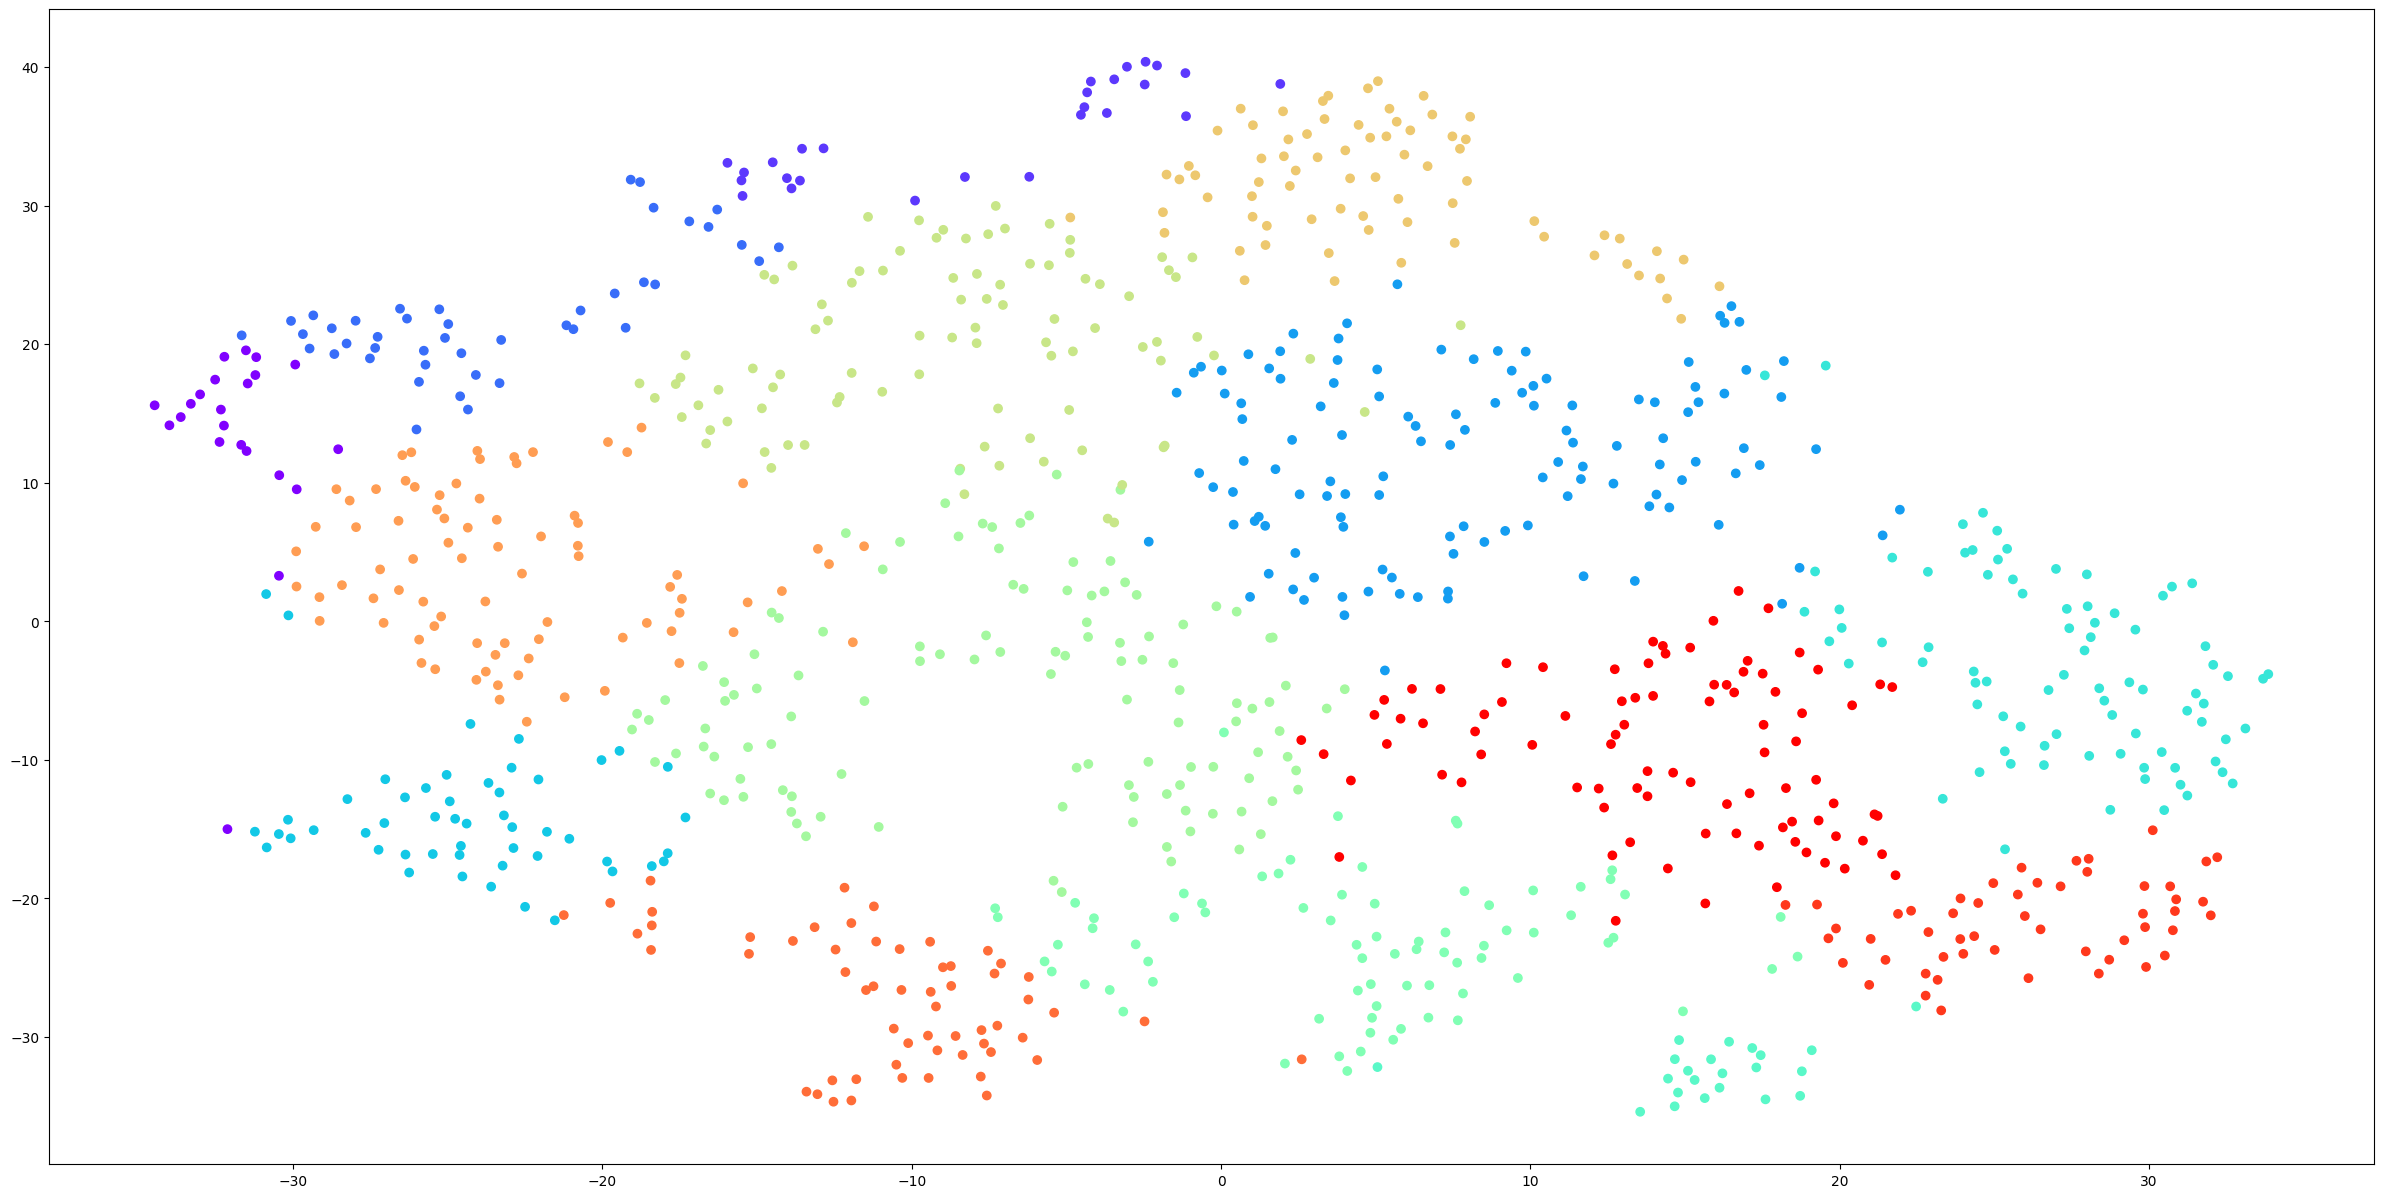

In [24]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 11 класстеров

In [25]:
kmeans = KMeans(
    n_clusters=11, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

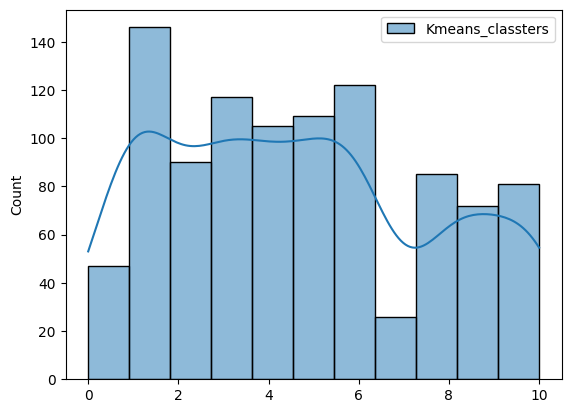

In [26]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

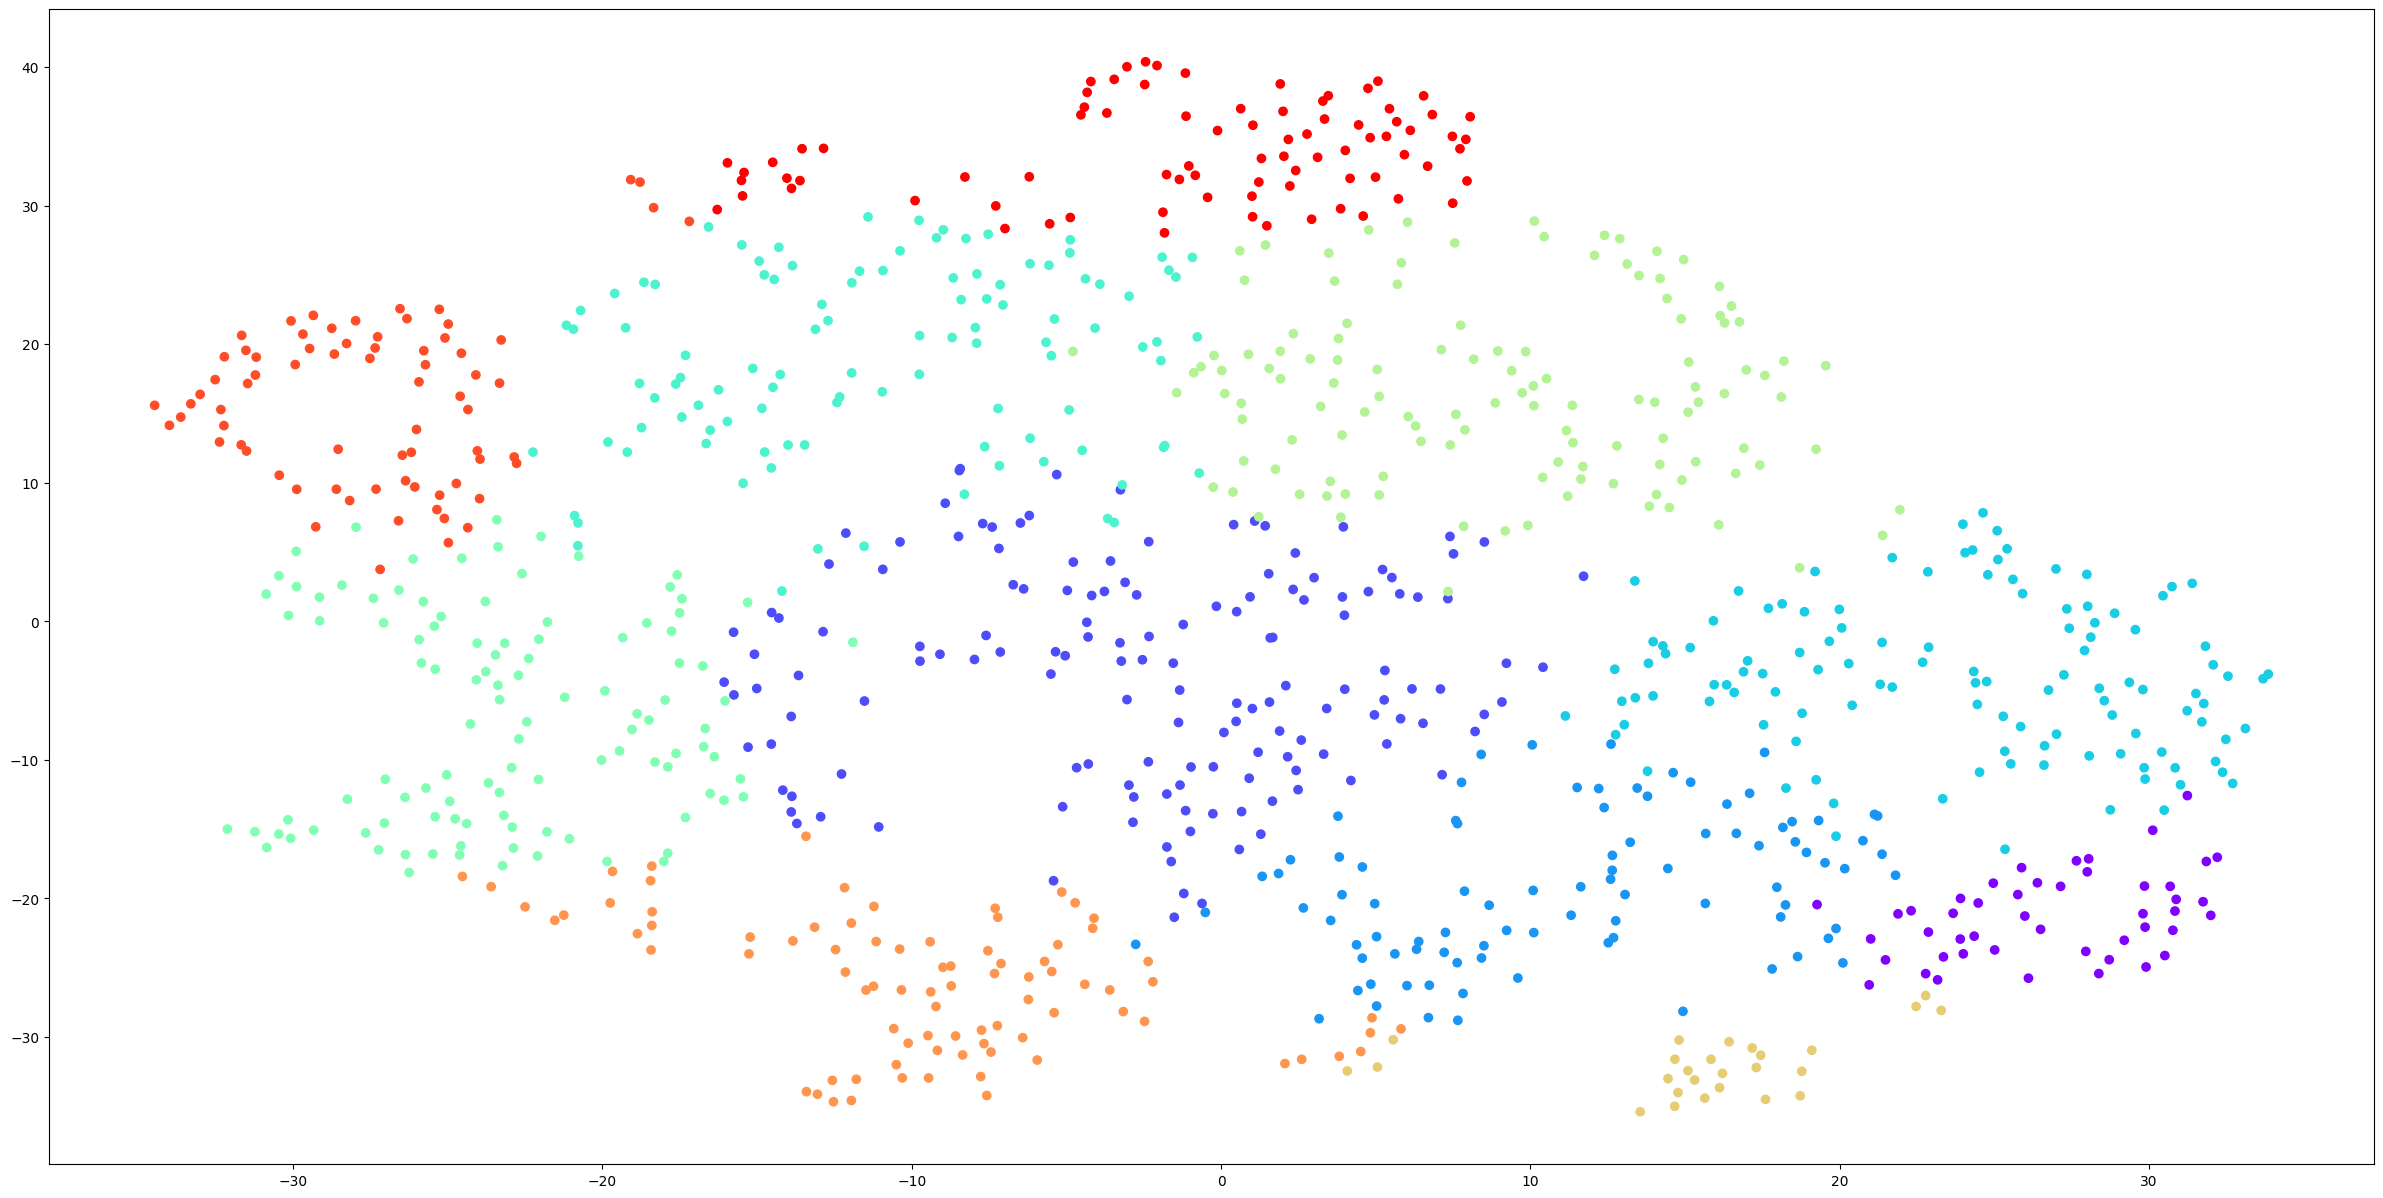

In [27]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 12 класстеров

In [28]:
kmeans = KMeans(
    n_clusters=15, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

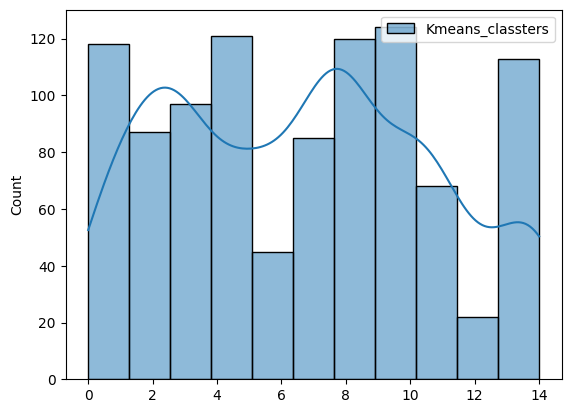

In [29]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

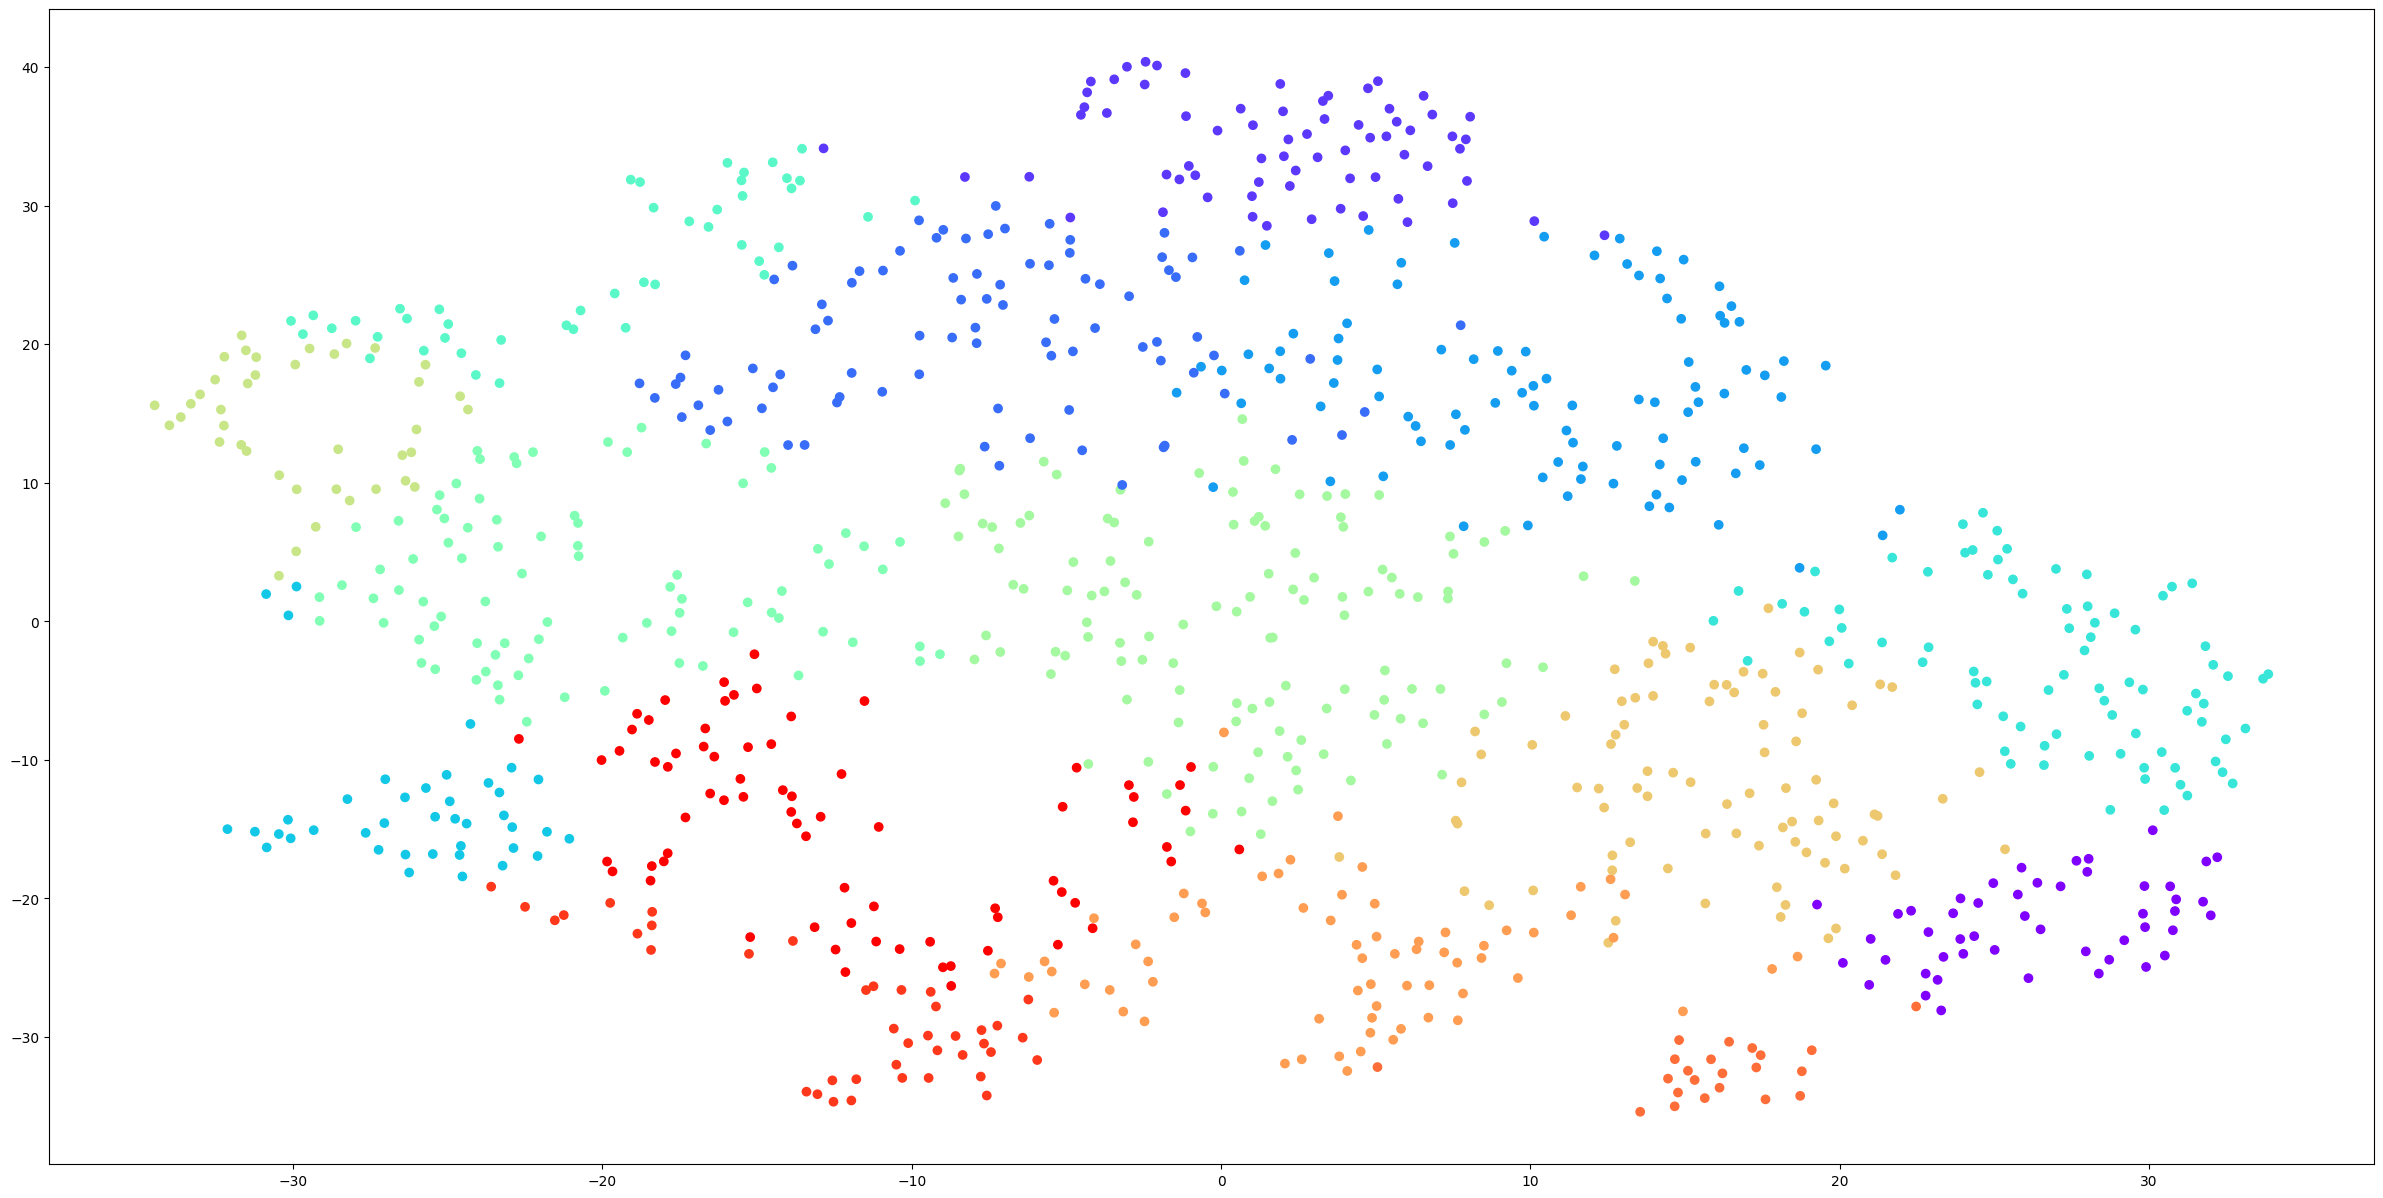

In [30]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 13 класстеров

In [31]:
kmeans = KMeans(
    n_clusters=13, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

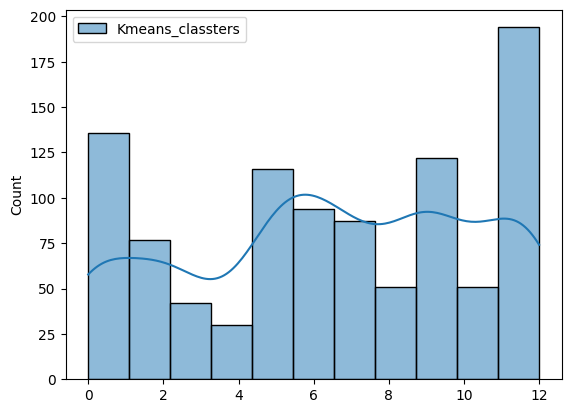

In [32]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

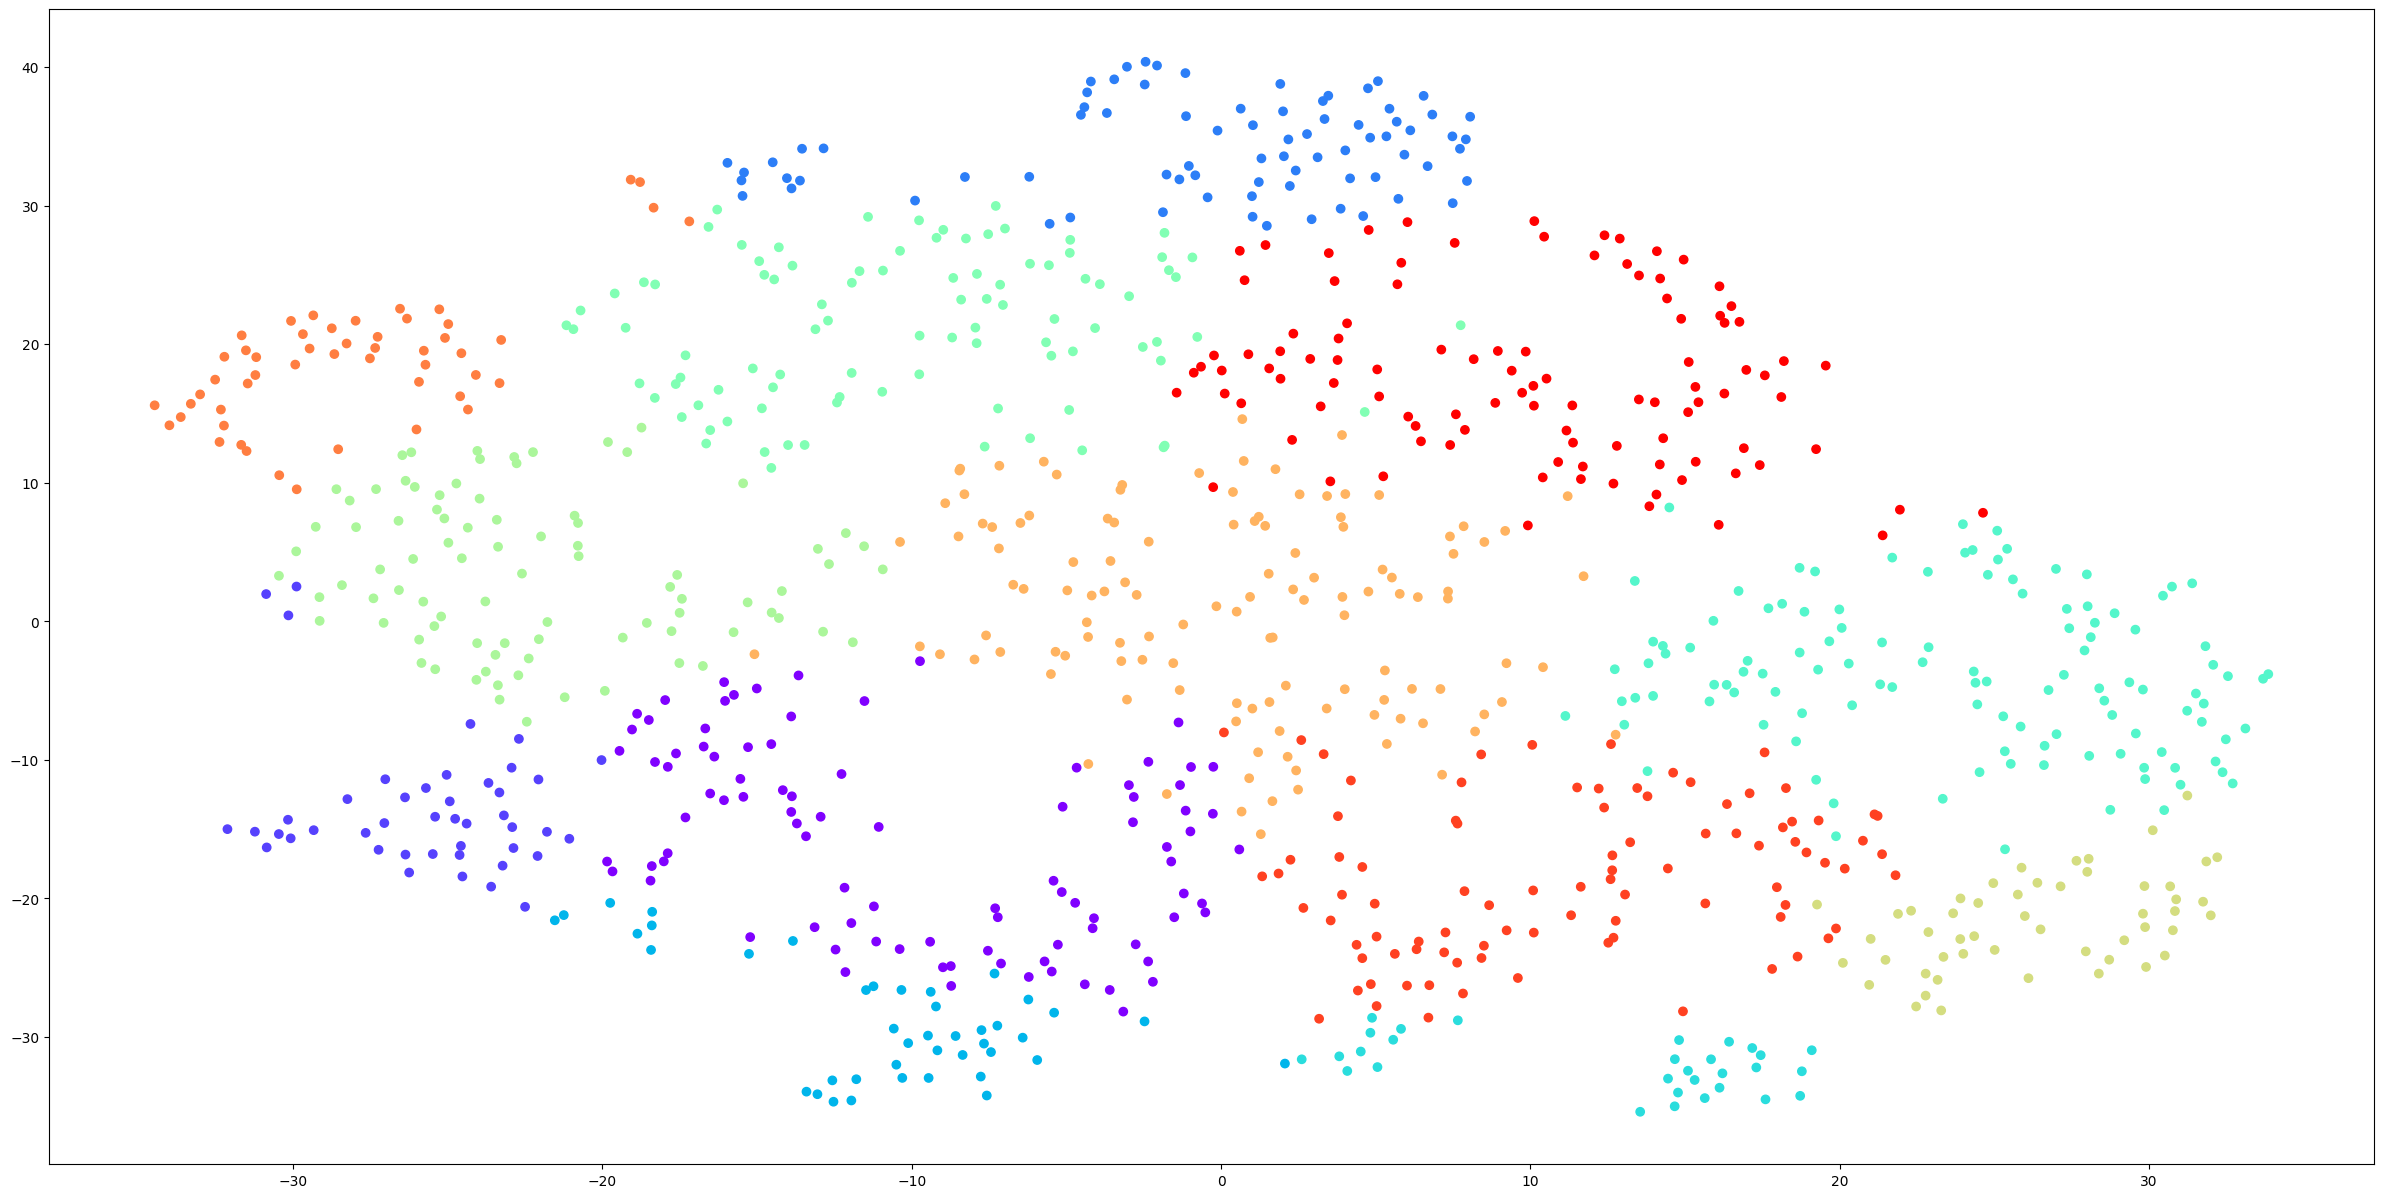

In [33]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 14 класстеров

In [34]:
kmeans = KMeans(
    n_clusters=14, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

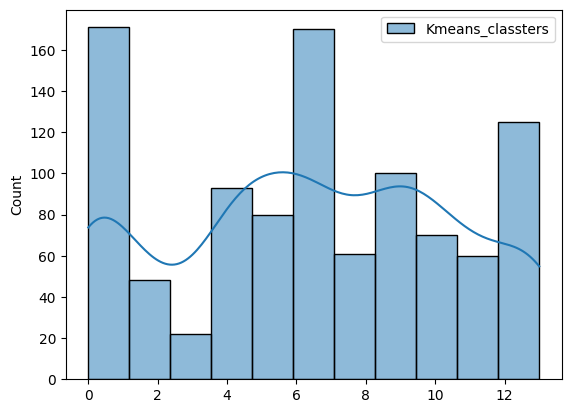

In [35]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

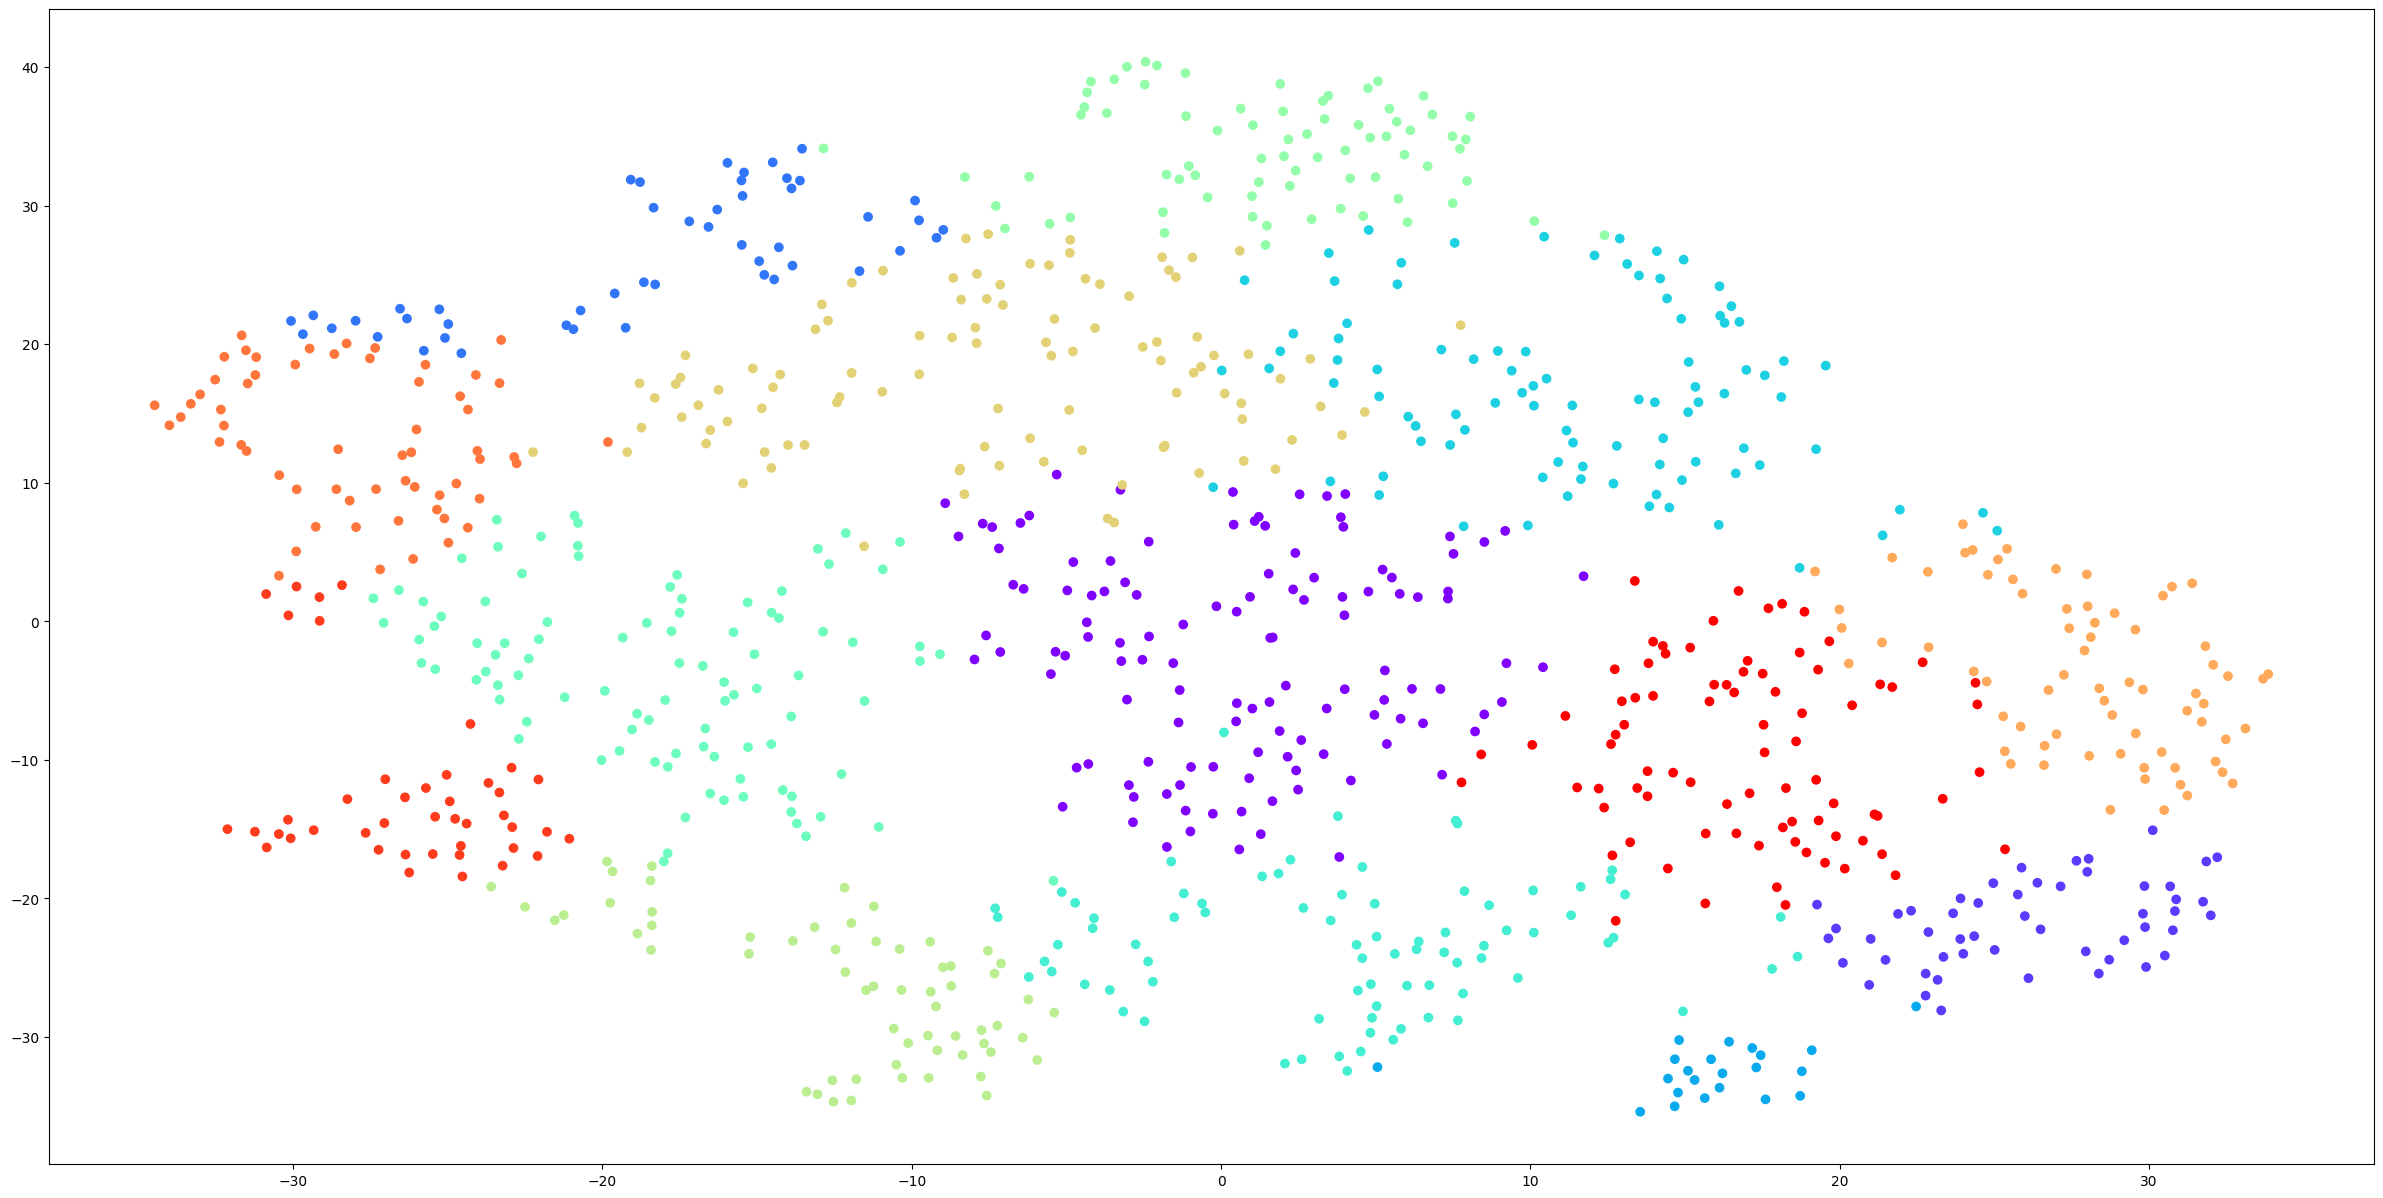

In [36]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 15 класстеров

In [37]:
kmeans = KMeans(
    n_clusters=15, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)
kmeans_prediction

array([ 1,  9,  3, 10,  2,  6,  2, 12, 11, 14,  5, 12,  8,  2, 13, 12, 13,
        6, 10,  4,  9,  2, 12,  1,  5, 10,  1,  2, 14,  3, 12,  4,  4, 12,
       14,  8, 10,  0,  3, 10,  3,  6, 14,  6,  4,  5,  4, 12,  7,  9, 12,
       10,  3,  1,  7,  4, 14,  2,  5,  1,  1,  7, 12, 10, 10,  7,  9,  8,
        6,  3,  4, 14,  5,  0,  1, 12, 14,  3,  7,  3, 12, 14, 12,  9,  1,
        4, 10,  5, 10,  2,  9,  9,  8, 12,  3,  4,  1, 14,  7,  0, 14, 14,
        4,  9,  6, 10,  4,  6, 11,  2, 13,  2,  5, 14,  6, 12,  5,  8,  3,
       12,  3,  0, 12,  6,  8,  4,  3,  9,  8, 10,  8,  4,  9,  9,  8,  2,
       12, 10,  7,  9,  6,  2, 12,  5,  0,  1, 10,  1, 11,  8,  2,  3, 12,
       14,  4,  6,  6, 14, 12, 13, 12,  1,  9, 11,  6,  8, 12, 12, 12,  1,
        2,  0,  5, 10, 14,  3, 11, 12,  4,  1, 12, 10, 12,  1, 14, 12,  0,
        3,  0,  8, 10,  4, 13,  9, 12, 12, 12, 11,  9,  8,  9,  2,  3, 14,
        8,  4,  6,  6,  6, 13,  6,  2,  9,  5, 10,  9,  8, 10, 12, 11,  8,
        0,  2, 12,  9,  2

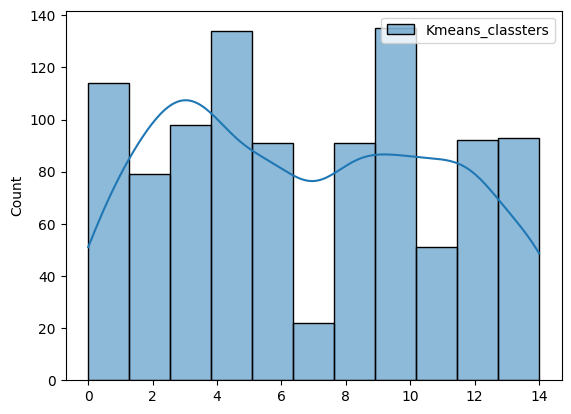

In [38]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

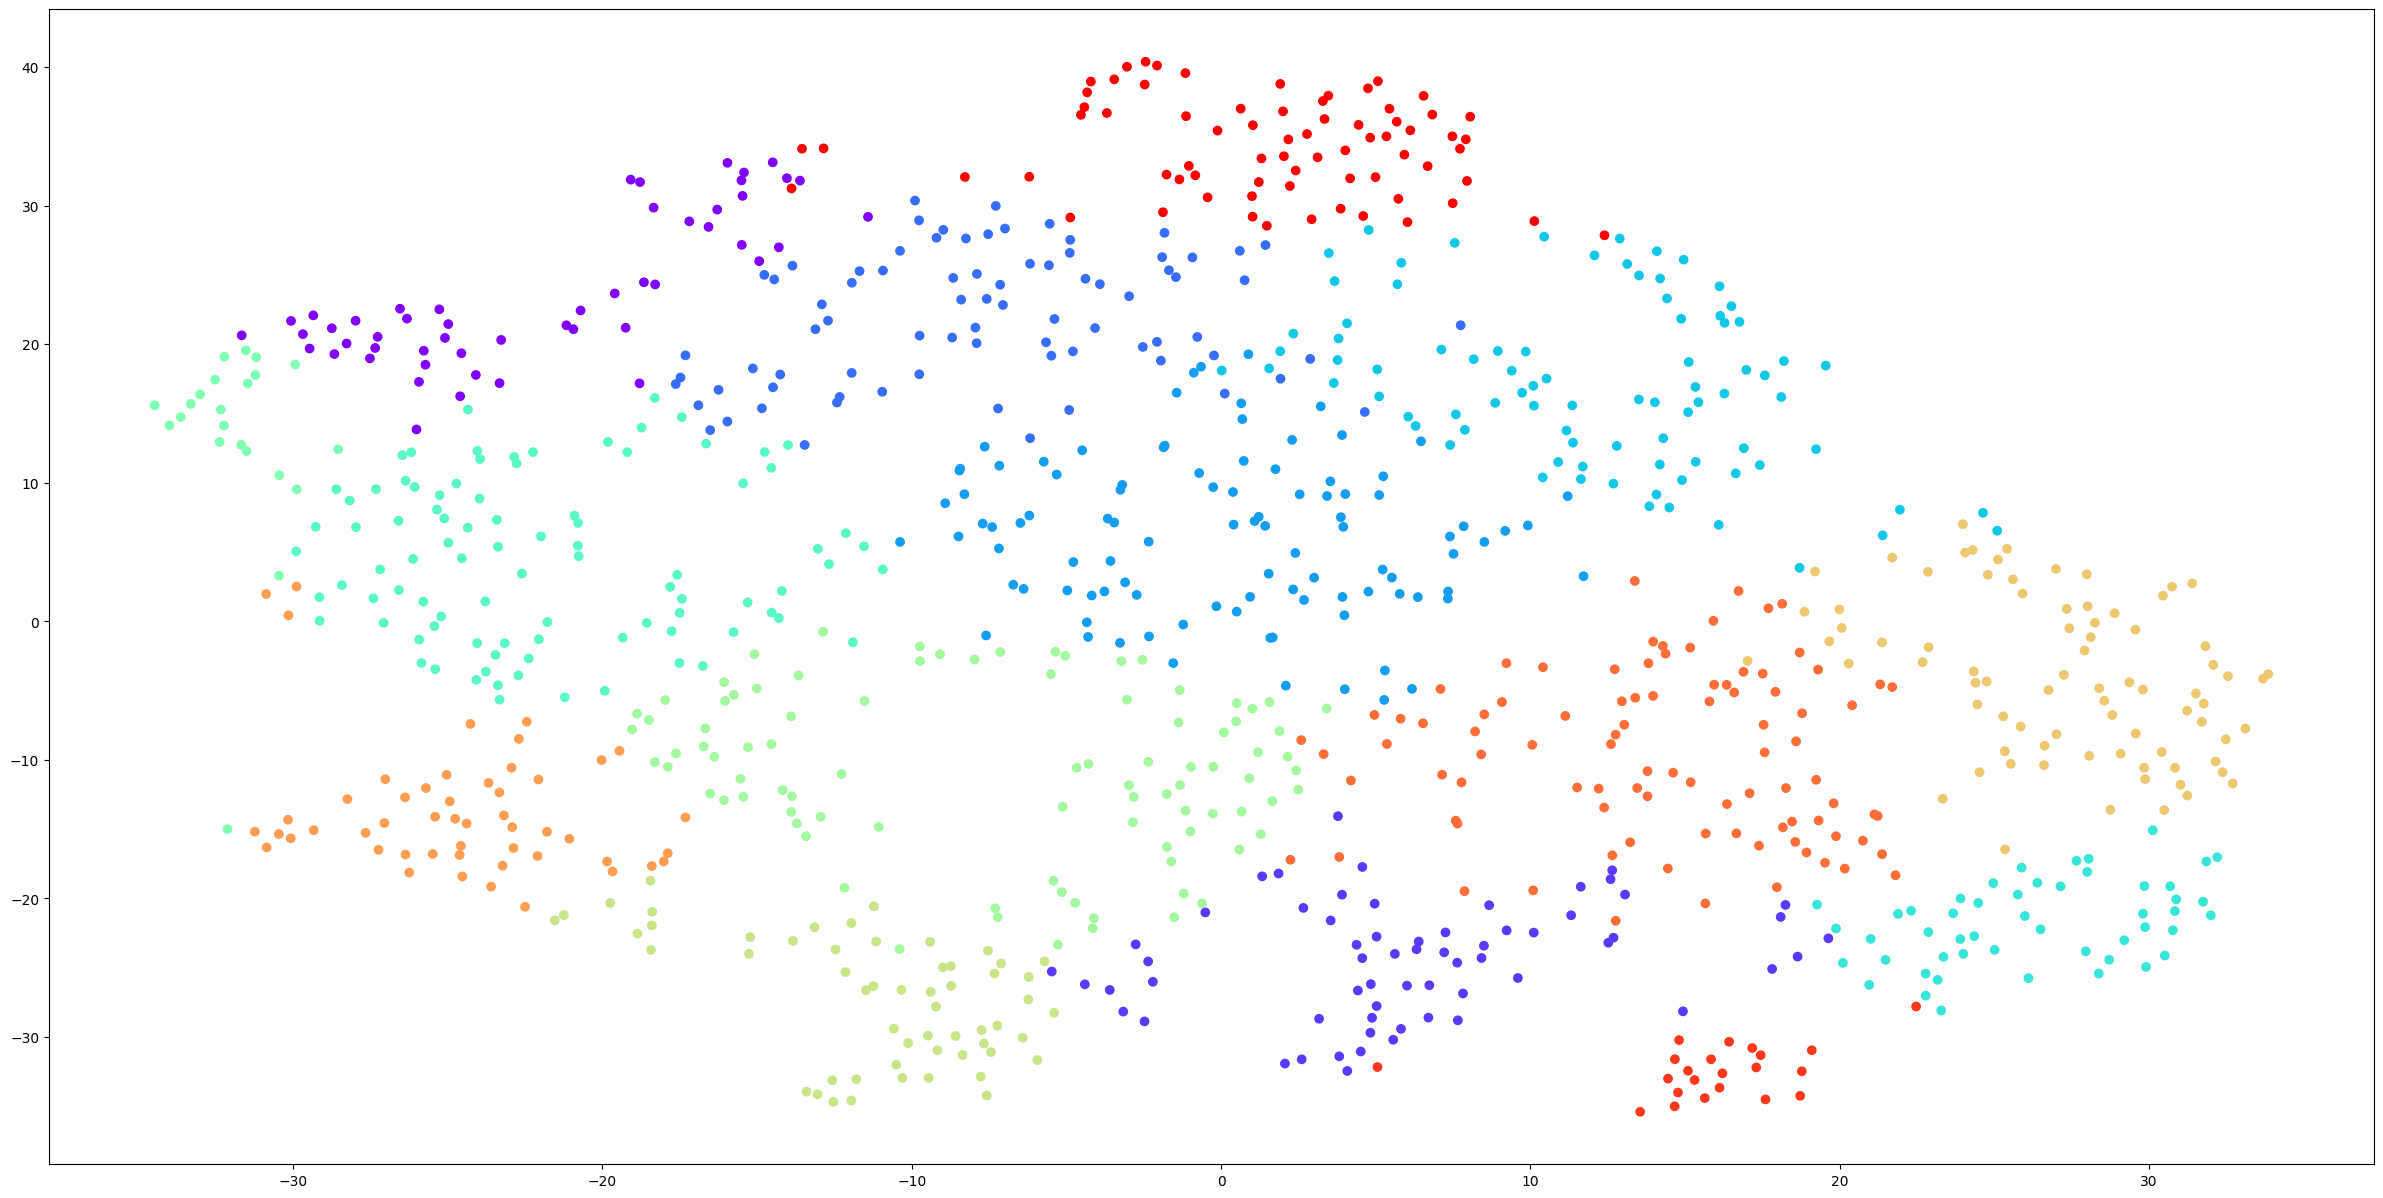

In [39]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

Как мы видим многие точки находятся довольно далеко от своих кластеров, попробуем другое разбиение

### Вывод
Если полагаться на визуальный анализ, то 9 класстеров является наилучшим результатом
Выбросы из класетров имеются, но их единицы

## На основании вышеполученной информации, разобьем данные на 9 класстеров

In [40]:
kmeans = KMeans(
    n_clusters=9, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=5, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=500, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

In [41]:
df['Claster'] = kmeans_prediction

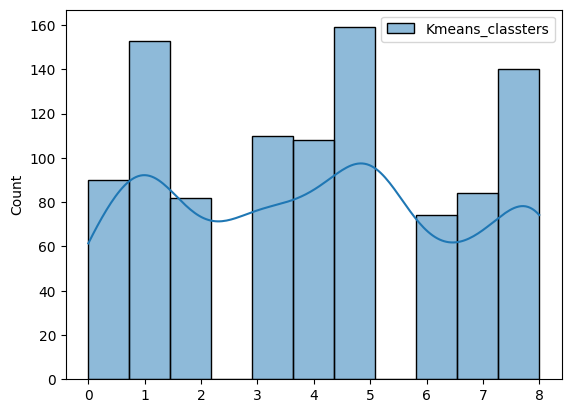

In [42]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

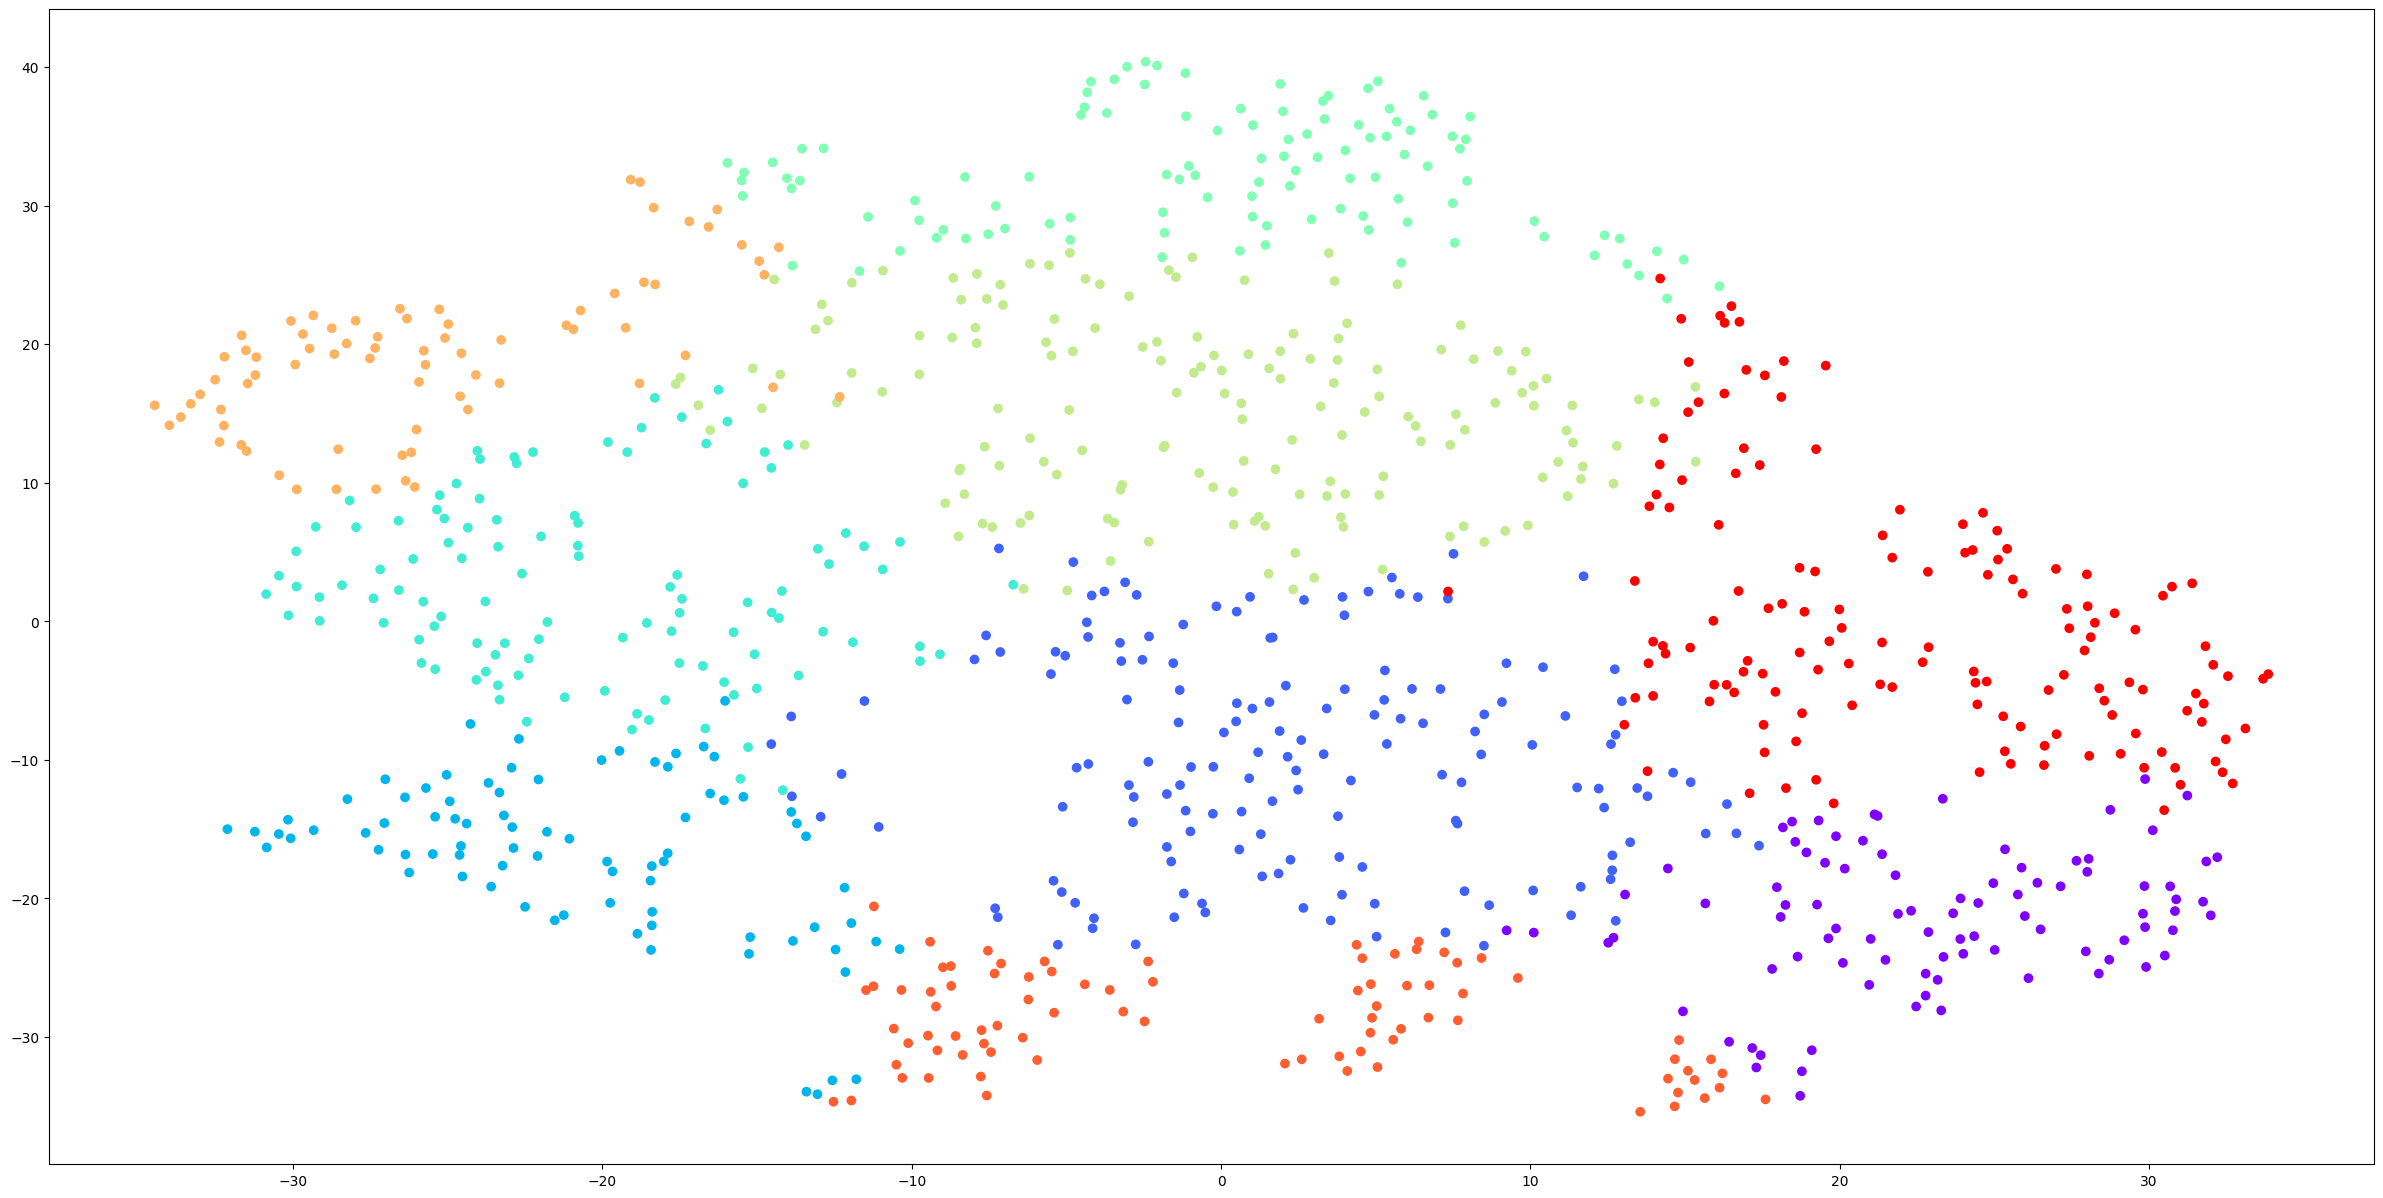

In [43]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

# Обучим классификатор "дерево решений" и посмотрим по каким параметрам определяется класс

In [44]:
df.shape

(1000, 12)

In [45]:
x = df.drop('Claster', axis=1)
y = kmeans.labels_

In [46]:
# Get train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

In [47]:
# Classifier
np.random.seed(42)

param_grid = {# 'max_features': ['sqrt', 'log2'], # Макс кол-во признаков в листе
             'ccp_alpha': [0.1, .01, .001], # Внутренняя подстройка параметров
             'max_depth': [3, 10], # Макс глубина дерева
             # 'criterion': ['gini', 'entropy', 'log_loss'] # Функция для измерения качества разделения.
              'criterion': ['gini'] # Оптимален
             }
dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=3, verbose=True)
grid_search.fit(x_train, y_train)
best_dec_tree = grid_search.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [48]:
score = accuracy_score(y_test, best_dec_tree.predict(x_test))
print("accuracy:", score)

accuracy: 0.91


In [49]:
plt.figure(figsize=(300,50))
tree.plot_tree(best_dec_tree, feature_names=df.columns[:], fontsize=20)
plt.savefig('Dtree.png')

In [50]:
import joblib
joblib.dump(best_dec_tree, 'DesTreeClassifier.save')

['DesTreeClassifier.save']

In [51]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки', 'Claster'],
      dtype='object')

## Значимость параетров:

Больше всего модель опирается на:

1) 'модуль упругости, ГПа
2) 'Поверхностная плотность, г/м2'
3) 'Температура вспышки, С_2'
4) 'Соотношение матрица-наполнитель'

Меньше всего модель опирается на:

1) 'Содержание эпоксидных групп,%_2'
2) 'Потребление смолы, г/м2'
3) 'Плотность, кг/м3'
6) 'Количество отвердителя, м.%'
7) 'Плотность нашивки'

Модель вообще не опирается на:

1) 'Шаг нашивки'
2) 'Угол нашивки, град'

! Возможно данные параметры можно удалить из датасета

1) 'Шаг нашивки'
2) 'Угол нашивки, град'

In [52]:
df_describe = df.describe().T
df_describe

count         mean         std          min  \
Соотношение матрица-наполнитель  1000.0     2.930612    0.913939     0.389403   
Плотность, кг/м3                 1000.0  1975.666791   73.796817  1731.764635   
модуль упругости, ГПа            1000.0   739.950520  330.327013     2.436909   
Количество отвердителя, м.%      1000.0   110.541116   28.304470    17.740275   
Содержание эпоксидных групп,%_2  1000.0    22.243850    2.406999    14.254985   
Температура вспышки, С_2         1000.0   285.911287   40.962756   160.255843   
Поверхностная плотность, г/м2    1000.0   483.024665  280.811736     0.603740   
Потребление смолы, г/м2          1000.0   218.386876   59.819777    33.803026   
Угол нашивки, град               1000.0    45.000000   45.022517     0.000000   
Шаг нашивки                      1000.0     6.909904    2.560031     0.037639   
Плотность нашивки                1000.0    57.181470   12.304355    11.740126   
Claster                          1000.0     4.026000    2.590760     0.000000   

                                         25%          50%          75%  \
Соотношение матрица-наполнитель     2.318526     2.907832     3.552539   
Плотность, кг/м3                 1924.203433  1977.574305  2021.159498   
модуль упругости, ГПа             498.438068   741.148111   962.851423   
Количество отвердителя, м.%        92.170589   110.162666   130.311975   
Содержание эпоксидных групп,%_2    20.558296    22.230761    23.982115   
Температура вспышки, С_2          258.539199   285.853960   313.581449   
Поверхностная плотность, г/м2     268.057473   452.972263   694.210382   
Потребление смолы, г/м2           179.190489   217.277006   257.495647   
Угол нашивки, град                  0.000000    45.000000    90.000000   
Шаг нашивки                         5.116518     6.913444     8.585130   
Плотность нашивки                  49.821889    57.362576    64.986942   
Claster                             2.000000     4.000000     6.000000   

                                         max  
Соотношение матрица-наполнитель     5.591742  
Плотность, кг/м3                 2207.773481  
модуль упругости, ГПа            1911.536477  
Количество отвердителя, м.%       198.953207  
Содержание эпоксидных групп,%_2    28.955094  
Температура вспышки, С_2          413.273418  
Поверхностная плотность, г/м2    1399.542362  
Потребление смолы, г/м2           414.590628  
Угол нашивки, град                 90.000000  
Шаг нашивки                        14.440522  
Плотность нашивки                 103.988901  
Claster                             8.000000

In [53]:
df_corr = df.corr()
df_corr

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                         1.000000   
Плотность, кг/м3                                        0.011033   
модуль упругости, ГПа                                   0.032246   
Количество отвердителя, м.%                            -0.017575   
Содержание эпоксидных групп,%_2                         0.027885   
Температура вспышки, С_2                               -0.011712   
Поверхностная плотность, г/м2                          -0.011906   
Потребление смолы, г/м2                                 0.078841   
Угол нашивки, град                                     -0.031401   
Шаг нашивки                                             0.028404   
Плотность нашивки                                      -0.005432   
Claster                                                 0.031062   

                                 Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель          0.011033               0.032246   
Плотность, кг/м3                         1.000000              -0.017544   
модуль упругости, ГПа                   -0.017544               1.000000   
Количество отвердителя, м.%             -0.032137               0.023490   
Содержание эпоксидных групп,%_2         -0.011680              -0.006186   
Температура вспышки, С_2                -0.018260               0.031181   
Поверхностная плотность, г/м2            0.038236              -0.017841   
Потребление смолы, г/м2                 -0.027946              -0.007369   
Угол нашивки, град                      -0.065604              -0.020399   
Шаг нашивки                             -0.057841              -0.007003   
Плотность нашивки                        0.082868               0.062844   
Claster                                  0.018150              -0.183123   

                                 Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                    -0.017575   
Плотность, кг/м3                                   -0.032137   
модуль упругости, ГПа                               0.023490   
Количество отвердителя, м.%                         1.000000   
Содержание эпоксидных групп,%_2                     0.013484   
Температура вспышки, С_2                            0.081562   
Поверхностная плотность, г/м2                       0.048636   
Потребление смолы, г/м2                             0.008184   
Угол нашивки, град                                  0.040215   
Шаг нашивки                                         0.002655   
Плотность нашивки                                   0.019772   
Claster                                             0.009452   

                                 Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                         0.027885   
Плотность, кг/м3                                       -0.011680   
модуль упругости, ГПа                                  -0.006186   
Количество отвердителя, м.%                             0.013484   
Содержание эпоксидных групп,%_2                         1.000000   
Температура вспышки, С_2                               -0.008072   
Поверхностная плотность, г/м2                          -0.007685   
Потребление смолы, г/м2                                 0.015057   
Угол нашивки, град                                      0.008400   
Шаг нашивки                                             0.012065   
Плотность нашивки                                      -0.044336   
Claster                                                 0.012063   

                                 Температура вспышки, С_2  \
Соотношение матрица-наполнитель                 -0.011712   
Плотность, кг/м3                                -0.018260   
модуль упругости, ГПа                            0.031181   
Количество отвердителя, м.%                      0.081562   
Содержание эпоксидных групп,%_2                 -0.008072   
Температура вспышки, С_2                         1.000000   
Поверхностная 

# Проанализируем корреляцию данных параметров в каждом отдельном кластере

In [54]:
ds_by_clusters = []
for n in range(0, max(np.unique(kmeans_prediction)) + 1):
    one_clusster = df.loc[(df['Claster'] == n), ]
    ds_by_clusters.append(one_clusster)

## Проанализаирум каждый кластер

### Анализ кластера 1

In [55]:
df_describe_0 = ds_by_clusters[0].describe().T
df_describe_0

count         mean         std          min  \
Соотношение матрица-наполнитель   90.0     2.847319    0.866054     0.986746   
Плотность, кг/м3                  90.0  1977.006612   72.301320  1816.107716   
модуль упругости, ГПа             90.0  1254.726826  157.261423  1047.328372   
Количество отвердителя, м.%       90.0   109.796972   27.300198    29.956150   
Содержание эпоксидных групп,%_2   90.0    22.478520    2.508550    15.881668   
Температура вспышки, С_2          90.0   297.372204   37.309968   179.374391   
Поверхностная плотность, г/м2     90.0   281.676262  137.240973     1.668002   
Потребление смолы, г/м2           90.0   211.354043   60.350097    87.797280   
Угол нашивки, град                90.0    43.000000   45.207387     0.000000   
Шаг нашивки                       90.0     7.135801    2.692536     0.310815   
Плотность нашивки                 90.0    57.451910   12.687712    24.283523   
Claster                           90.0     0.000000    0.000000     0.000000   

                                         25%          50%          75%  \
Соотношение матрица-наполнитель     2.265147     2.888847     3.420271   
Плотность, кг/м3                 1927.418541  1984.508334  2018.596287   
модуль упругости, ГПа            1132.992864  1218.061347  1338.147562   
Количество отвердителя, м.%        91.408883   111.398611   130.214279   
Содержание эпоксидных групп,%_2    20.624545    22.443161    24.374265   
Температура вспышки, С_2          275.734898   296.701095   323.384713   
Поверхностная плотность, г/м2     197.496390   297.969882   379.570834   
Потребление смолы, г/м2           166.780665   206.967957   250.276653   
Угол нашивки, град                  0.000000     0.000000    90.000000   
Шаг нашивки                         5.390546     7.112019     8.974821   
Плотность нашивки                  49.935862    56.286837    64.395378   
Claster                             0.000000     0.000000     0.000000   

                                         max  
Соотношение матрица-наполнитель     5.455566  
Плотность, кг/м3                 2132.378269  
модуль упругости, ГПа            1911.536477  
Количество отвердителя, м.%       167.468034  
Содержание эпоксидных групп,%_2    28.955094  
Температура вспышки, С_2          379.172951  
Поверхностная плотность, г/м2     534.070329  
Потребление смолы, г/м2           383.663401  
Угол нашивки, град                 90.000000  
Шаг нашивки                        13.571921  
Плотность нашивки                  88.072490  
Claster                             0.000000

In [56]:
ds_clasters_cor_0 = ds_by_clusters[0].corr()
ds_clasters_cor_0

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                         1.000000   
Плотность, кг/м3                                        0.080504   
модуль упругости, ГПа                                  -0.128700   
Количество отвердителя, м.%                            -0.118938   
Содержание эпоксидных групп,%_2                         0.078496   
Температура вспышки, С_2                               -0.006631   
Поверхностная плотность, г/м2                          -0.002424   
Потребление смолы, г/м2                                 0.053354   
Угол нашивки, град                                     -0.016069   
Шаг нашивки                                            -0.001428   
Плотность нашивки                                       0.063936   
Claster                                                      NaN   

                                 Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель          0.080504              -0.128700   
Плотность, кг/м3                         1.000000              -0.056637   
модуль упругости, ГПа                   -0.056637               1.000000   
Количество отвердителя, м.%             -0.041700              -0.212717   
Содержание эпоксидных групп,%_2         -0.164002              -0.100880   
Температура вспышки, С_2                -0.181780              -0.062344   
Поверхностная плотность, г/м2            0.125592               0.009703   
Потребление смолы, г/м2                  0.158351              -0.054867   
Угол нашивки, град                       0.128538               0.133559   
Шаг нашивки                             -0.036816               0.025739   
Плотность нашивки                        0.254207              -0.082694   
Claster                                       NaN                    NaN   

                                 Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                    -0.118938   
Плотность, кг/м3                                   -0.041700   
модуль упругости, ГПа                              -0.212717   
Количество отвердителя, м.%                         1.000000   
Содержание эпоксидных групп,%_2                     0.018348   
Температура вспышки, С_2                            0.036615   
Поверхностная плотность, г/м2                      -0.018514   
Потребление смолы, г/м2                            -0.086990   
Угол нашивки, град                                  0.127445   
Шаг нашивки                                        -0.019173   
Плотность нашивки                                  -0.050357   
Claster                                                  NaN   

                                 Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                         0.078496   
Плотность, кг/м3                                       -0.164002   
модуль упругости, ГПа                                  -0.100880   
Количество отвердителя, м.%                             0.018348   
Содержание эпоксидных групп,%_2                         1.000000   
Температура вспышки, С_2                               -0.035812   
Поверхностная плотность, г/м2                           0.093349   
Потребление смолы, г/м2                                -0.041516   
Угол нашивки, град                                     -0.157847   
Шаг нашивки                                            -0.037486   
Плотность нашивки                                       0.021410   
Claster                                                      NaN   

                                 Температура вспышки, С_2  \
Соотношение матрица-наполнитель                 -0.006631   
Плотность, кг/м3                                -0.181780   
модуль упругости, ГПа                           -0.062344   
Количество отвердителя, м.%                      0.036615   
Содержание эпоксидных групп,%_2                 -0.035812   
Температура вспышки, С_2                         1.000000   
Поверхностная 

<Axes: >

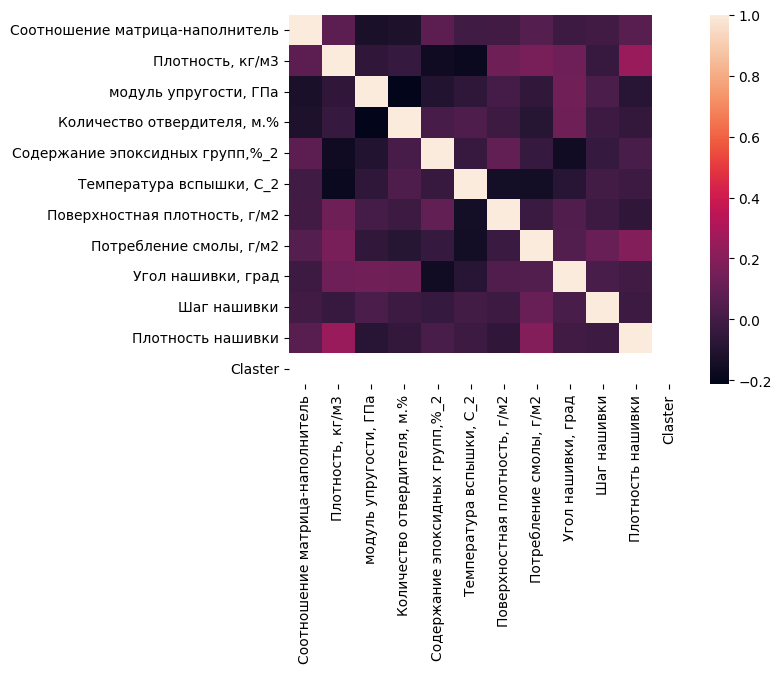

In [57]:
sns.heatmap(ds_clasters_cor_0)

In [ ]:
sns.pairplot(ds_by_clusters[0], diag_kind='kde')

Относительно общего датасета, что логично, можно наблюдать значительно большие корреляции между различными параметрами. Самыми явными из которых являются (в данном случае если коэффициент более 0.2):
* Соотношение матрица-наполнитель - Плотность, кг/м3 : 0.177525 - в датасете не разбитом на кластеры соотношение составляло: 0.011033
* Соотношение матрица-наполнитель - модуль упругости, ГПа: -0.271604 - в датасете не разбитом на кластеры соотношение составляло: 0.032246
* Соотношение матрица-наполнитель - Температура вспышки, С_2: 0.136850 - в датасете не разбитом на кластеры соотношение составляло: -0.011712
* Соотношение матрица-наполнитель - Угол нашивки, град: 0.105049 - в датасете не разбитом на кластеры соотношение составляло: -0.031401
* Плотность, кг/м3 - Содержание эпоксидных групп,%_2: -0.167816 - в датасете не разбитом на кластеры соотношение составляло: -0.011680
* Плотность, кг/м3 - Температура вспышки, С_2: -0.179055 - в датасете не разбитом на кластеры соотношение составляло: -0.018260
* Плотность, кг/м3 - Плотность нашивки: 0.305923 - в датасете не разбитом на кластеры соотношение составляло: 0.023465
* 

А также на некоторых графиках начинает прослеживаться линейная зависимость параметров.

Также, как видно из описания данного кластера 

### Во сколько раз изменились значения корреляции. Кластер 1

In [ ]:
corr_changed_claster_0 = ds_clasters_cor_0 / df_corr
corr_changed_claster_0

In [ ]:
np.mean(ds_clasters_cor_0 / df_corr)

### Анализ кластера 2

In [ ]:
df_describe_1 = ds_by_clusters[1].describe().T
df_describe_1

In [ ]:
ds_clasters_cor_1 = ds_by_clusters[1].corr()
ds_clasters_cor_1

In [ ]:
sns.heatmap(ds_clasters_cor_1)

In [ ]:
sns.pairplot(ds_by_clusters[1], diag_kind='kde')

### Во сколько раз изменились значения корреляции. Кластер 2

In [ ]:
corr_changed_claster_1 = ds_clasters_cor_1 / df_corr
corr_changed_claster_1

In [ ]:
np.mean(ds_clasters_cor_1 / df_corr)

### Анализ кластера 3

In [ ]:
df_describe_2 = ds_by_clusters[2].describe().T
df_describe_2

In [ ]:
ds_clasters_cor_2 = ds_by_clusters[2].corr()
ds_clasters_cor_2

In [ ]:
sns.heatmap(ds_clasters_cor_2)

In [ ]:
sns.pairplot(ds_by_clusters[3], diag_kind='kde')

### Во сколько раз изменились значения корреляции. Кластер 3

In [ ]:
corr_changed_claster_2 = ds_clasters_cor_2 / df_corr
corr_changed_claster_2

In [ ]:
np.mean(ds_clasters_cor_2 / df_corr)

### Анализ кластера 4

In [ ]:
df_describe_3 = ds_by_clusters[3].describe().T
df_describe_3

In [ ]:
ds_clasters_cor_3 = ds_by_clusters[3].corr()
ds_clasters_cor_3

In [ ]:
sns.heatmap(ds_clasters_cor_3)

In [ ]:
sns.pairplot(ds_by_clusters[3], diag_kind='kde')

### Во сколько раз изменились значения корреляции. Кластер 4

In [ ]:
corr_changed_claster_3 = ds_clasters_cor_3 / df_corr
corr_changed_claster_3

In [ ]:
np.mean(ds_clasters_cor_3 / df_corr)

### Анализ кластера 5

In [ ]:
df_describe_4 = ds_by_clusters[4].describe().T
df_describe_4

In [ ]:
ds_clasters_cor_4 = ds_by_clusters[4].corr()
ds_clasters_cor_4

In [ ]:
sns.heatmap(ds_clasters_cor_4)

In [ ]:
sns.pairplot(ds_by_clusters[4], diag_kind='kde')

### Во сколько раз изменились значения корреляции. Кластер 5

In [ ]:
corr_changed_claster_4 = ds_clasters_cor_4 / df_corr
corr_changed_claster_4

In [ ]:
np.mean(ds_clasters_cor_4 / df_corr)

### Анализ кластера 6

In [ ]:
df_describe_5 = ds_by_clusters[5].describe().T
df_describe_5

In [ ]:
ds_clasters_cor_5 = ds_by_clusters[5].corr()
ds_clasters_cor_5

In [ ]:
sns.heatmap(ds_clasters_cor_5)

In [ ]:
sns.pairplot(ds_by_clusters[5], diag_kind='kde')

### Во сколько раз изменились значения корреляции. Кластер 6

In [ ]:
corr_changed_claster_5 = ds_clasters_cor_5 / df_corr
corr_changed_claster_5

In [ ]:
np.mean(ds_clasters_cor_5 / df_corr)

### Анализ кластера 7

In [ ]:
df_describe_6 = ds_by_clusters[6].describe().T
df_describe_6

In [ ]:
ds_clasters_cor_6 = ds_by_clusters[6].corr()
ds_clasters_cor_6

In [ ]:
sns.heatmap(ds_clasters_cor_6)

In [ ]:
sns.pairplot(ds_by_clusters[6], diag_kind='kde')

### Во сколько раз изменились значения корреляции. Кластер 7

In [ ]:
corr_changed_claster_6 = ds_clasters_cor_6 / df_corr
corr_changed_claster_6

In [ ]:
np.mean(ds_clasters_cor_6 / df_corr)

### Анализ кластера 8

In [ ]:
df_describe_7 = ds_by_clusters[7].describe().T
df_describe_7

In [ ]:
ds_clasters_cor_7 = ds_by_clusters[7].corr()
ds_clasters_cor_7

In [ ]:
sns.heatmap(ds_clasters_cor_7)

In [ ]:
sns.pairplot(ds_by_clusters[7], diag_kind='kde')

### Во сколько раз изменились значения корреляции. Кластер 8

In [ ]:
corr_changed_claster_7 = ds_clasters_cor_7 / df_corr
corr_changed_claster_7

In [ ]:
np.mean(ds_clasters_cor_7 / df_corr)

### Анализ кластера 9

In [ ]:
df_describe_8 = ds_by_clusters[8].describe().T
df_describe_8

In [ ]:
ds_clasters_cor_8 = ds_by_clusters[8].corr()
ds_clasters_cor_8

In [ ]:
sns.heatmap(ds_clasters_cor_8)

In [ ]:
sns.pairplot(ds_by_clusters[8], diag_kind='kde')

### Во сколько раз изменились значения корреляции. Кластер 9

In [ ]:
corr_changed_claster_8 = ds_clasters_cor_8 / df_corr
corr_changed_claster_8

In [ ]:
np.mean(ds_clasters_cor_8 / df_corr)

## Выводы

In [ ]:
# Найдем средний абсолютный коэффициент изменения корреляции
corr_mean_changes_abs = (np.sqrt(corr_changed_claster_0**2) + 
                         np.sqrt(corr_changed_claster_1**2) + 
                         np.sqrt(corr_changed_claster_2**2) + 
                         np.sqrt(corr_changed_claster_3**2) + 
                         np.sqrt(corr_changed_claster_4**2) + 
                         np.sqrt(corr_changed_claster_5**2) + 
                         np.sqrt(corr_changed_claster_6**2) + 
                         np.sqrt(corr_changed_claster_7**2) + 
                         np.sqrt(corr_changed_claster_8**2)) / 9
corr_mean_changes_abs

Как видно из анализа изменения коэффициентов корреляции по каждому кластеру относительно исходного датасета, корреляция резко  увеличилась в отношениях:

Сильное увеличение корреляционного коэффициента:
* Потребление смолы, г/м2 - Поверхностная плотность, г/м2 - в 75.325431 раз

Мене заметный коэффициент увеличения:
* Соотношение матрица-наполнитель - Плотность нашивки - в 18.093341 раз
* Количество отвердителя, м.% - Шаг нашивки - в 16.699572 раз
* модуль упругости, ГПа - Содержание эпоксидных групп,%_2 - в 10.181618 раз
* модуль упругости, ГПа - Шаг нашивки - в 10.226706 раз

Менее чем 10ти кратно:
* Плотность, кг/м3 - Содержание эпоксидных групп,%_2 - в 9.037805 раз
* Соотношение матрица-наполнитель - Температура вспышки, С_2 - в 8.337822 раз
* Соотношение матрица-наполнитель - Поверхностная плотность, г/м2 - в 7.448122	раз
* Содержание эпоксидных групп,%_2 - Температура вспышки, С_2 - в 9.058285 раз
* Содержание эпоксидных групп,%_2 - Угол нашивки, град - в 8.421778 раз
* Содержание эпоксидных групп,%_2 - Шаг нашивки - в 7.064483 раз
* Потребление смолы, г/м2 - Плотность нашивки - в 7.388113 раз
* Шаг нашивки - Плотность нашивки - в 8.348697 раз

Остальыне коэффциенты не столь заметны и интересны

Можно попробовать выпилить:

Шаг нашивки, Потребление смолы, г/м2, Количество отвердителя, м.%

In [ ]:
# Найдем средний абсолютный коэффициент изменения общих характеристик датасета
describe_mean_changes_abs = (np.sqrt((df_describe_0/df_describe)**2) + 
                             np.sqrt((df_describe_1/df_describe)**2) + 
                             np.sqrt((df_describe_2/df_describe)**2) + 
                             np.sqrt((df_describe_3/df_describe)**2) + 
                             np.sqrt((df_describe_4/df_describe)**2) + 
                             np.sqrt((df_describe_5/df_describe)**2) + 
                             np.sqrt((df_describe_6/df_describe)**2) + 
                             np.sqrt((df_describe_7/df_describe)**2) + 
                             np.sqrt((df_describe_8/df_describe)**2)) / 9
describe_mean_changes_abs

Как видно из анализа коэффициентов изменения праметров датасета по описанию:

Сильные изменения в описании отмечаются на столбцах:
* модуль упругости, ГПа - где, в среднем, минимальное значение увеличилось в 214.038430 раз, а максимальное составляет 0.544151 относительно исходного датасета
* Поверхностная плотность, г/м2 - где, в среднем, минимальное значение увеличилось в 490.659277 раз, а максимальное составляет 0.585442 от исходного датасета


# Обучим и сравним регрессионные модели

In [ ]:
# Get train and test sets
x = df
y = Y_1
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
print((y_test, y_pred))

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

In [ ]:
MAE

In [ ]:
MSE

In [ ]:
R2

## Проведем анализ эффективности разных моделей на всех кластерах датасета

### Построение общих моделей на всем датасете (без учета кластеров)

In [ ]:
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, 
                                # max_features ='sqrt',
                                criterion='poisson'), # случайный лес {“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}
          KNeighborsRegressor(n_neighbors=10,
                              weights='distance'), # метод ближайших соседей {'uniform', 'distance', [callable]}
          SVR(kernel='sigmoid'), # метод опорных векторов с линейным ядром {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
          # LogisticRegression(), # логистическая регрессия
          DecisionTreeRegressor(min_samples_leaf=2,
                                criterion='absolute_error') # деревья решений {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
          ]

In [ ]:
x = df
# y = df_copy['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
# y = Y_1 + Y_2
y = pd.concat([Y_1, Y_2], join='inner', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [ ]:
# Нормализуем данные
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
y_column = y.columns

In [ ]:
# создаем временные структуры
TestModels = pd.DataFrame(columns=['Model', 'R2_Y_1', 'R2_Y_2'])
tmp = {}
# для каждой модели из списка
for model in models:
    # получаем имя модели
    model_name = str(model)
    tmp['Model'] = model_name[:model_name.index('(')]  
    
    # для каждого столбцам результирующего набора
    for i in range(y_train.shape[1]):
        # текущая колонка
        current_column = y_column[i]
        # обучаем модель
        model.fit(x_train, y_train[current_column]) 
        # вычисляем коэффициент детерминации
        y_true = y_test[current_column]
        y_pred = model.predict(x_test)
        tmp[f'R2_Y_{i+1}'] = r2_score(y_true, y_pred)
        print(model_name, i+1)
    # записываем данные и итоговый DataFrame
    TestModels.loc[len(TestModels.index)] = tmp
# делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

In [ ]:
TestModels

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y_1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y_2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')

### Построение моделей с учетом кластеров

In [ ]:
models_by_clustrs = []
ii = 1
for cluster in ds_by_clusters:
    
    models = [LinearRegression(), # метод наименьших квадратов
              RandomForestRegressor(n_estimators=500, 
                                    max_features ='sqrt',
                                    criterion='poisson'), # случайный лес {“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}
              KNeighborsRegressor(n_neighbors=5,
                                  weights='uniform'), # метод ближайших соседей {'uniform', 'distance', [callable]}
              SVR(kernel='poly'), # метод опорных векторов с линейным ядром {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
              # LogisticRegression(), # логистическая регрессия
              DecisionTreeRegressor(min_samples_leaf=2,
                                    criterion='poisson') # деревья решений {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
              ]
    
    x = cluster
    # y = df_copy['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
    # y = Y_1 + Y_2
    y = pd.concat([Y_1, Y_2], join='inner', axis=1)
    indexes = cluster.index
    y = y.loc[indexes]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)
    
    # Нормализуем данные
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    
    y_column = y.columns
    
    # создаем временные структуры
    TestModels = pd.DataFrame(columns=['Model', 'R2_Y_1', 'R2_Y_2'])
    tmp = {}
    # для каждой модели из списка
    for model in models:
        # получаем имя модели
        model_name = str(model)
        tmp['Model'] = model_name[:model_name.index('(')]  
        
        # для каждого столбцам результирующего набора
        for i in range(y_train.shape[1]):
            # текущая колонка
            current_column = y_column[i]
            # обучаем модель
            model.fit(x_train, y_train[current_column]) 
            # вычисляем коэффициент детерминации
            y_true = y_test[current_column]
            y_pred = model.predict(x_test)
            tmp[f'R2_Y_{i+1}'] = r2_score(y_true, y_pred)
            # print(model_name, i+1)
        # записываем данные и итоговый DataFrame
        TestModels.loc[len(TestModels.index)] = tmp
    # делаем индекс по названию модели
    TestModels.set_index('Model', inplace=True)
    models_by_clustrs.append(TestModels)
    print(f'The {ii} iteration ends')
    ii+=1

In [ ]:
i = 1
for model in models_by_clustrs:
    fig, axes = plt.subplots(ncols=2, figsize=(10,4))
    model.R2_Y_1.plot(ax=axes[0], kind='bar', title=f'R2_Y1_Cluster number {i}')
    model.R2_Y_2.plot(ax=axes[1], kind='bar', color='green', title=f'R2_Y2_Cluster number {i}')
    i+=1

## Обучим классификатор для нейронной сети

In [ ]:
df_for_NN = df_copy.drop('Соотношение матрица-наполнитель', axis=1)
y = kmeans_prediction
# Get train and test sets
x_train, x_test, y_train, y_test = train_test_split(df_for_NN, y, train_size=0.9)

# Classifier
np.random.seed(42)

param_grid = {# 'max_features': ['sqrt', 'log2'], # Макс кол-во признаков в листе
             'ccp_alpha': [0.1, .01, .001], # Внутренняя подстройка параметров
             'max_depth': [3, 10], # Макс глубина дерева
             # 'criterion': ['gini', 'entropy', 'log_loss'] # Функция для измерения качества разделения.
              'criterion': ['gini'] # Оптимален
             }
dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=3, verbose=True)
grid_search.fit(x_train, y_train)
best_dec_tree = grid_search.best_estimator_

score = accuracy_score(y_test, best_dec_tree.predict(x_test))
print("accuracy:", score)

plt.figure(figsize=(300,50))
tree.plot_tree(best_dec_tree, feature_names=df.columns[:], fontsize=20)
plt.savefig('Dtree_NN.png')

In [ ]:
import joblib
joblib.dump(best_dec_tree, 'DesTreeClassifier_NN.save')

## Нейронные сети

In [ ]:
df_for_NN = df_copy.drop('Соотношение матрица-наполнитель', axis=1)
df_for_NN['Cluster'] = kmeans_prediction
# # Transform categorical column
# OHE = OneHotEncoder(sparse_output=False)
# encodered_df = pd.DataFrame(OHE.fit_transform(df_for_NN[['Cluster']]))
# df_for_NN = df_for_NN.join(encodered_df)
# df_for_NN = df_for_NN.rename(columns={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8'})
# df_for_NN = df_for_NN.drop('Cluster', axis=1)
ds_by_clusters_NN = []
for n in range(0, max(np.unique(kmeans_prediction)) + 1):
    one_clusster = df_for_NN.loc[(df_for_NN['Cluster'] == n), ]
    # one_clusster = df_for_NN.loc[(df_for_NN[f'{n}'] == 1), ]
    # one_clusster = one_clusster.drop('Cluster', axis=1)
    ds_by_clusters_NN.append(one_clusster)

In [ ]:
ds_by_clusters_NN[0].columns

In [ ]:
# Подготовливаем данные для тестирования
sample_for_test = [claster.sample() for claster in ds_by_clusters_NN]

In [ ]:
# Удаляем примеры для тестирования из обучающего набора данных
iter = 0
ds_by_clusters_NN_without_test_samples = []
while iter != 9:
    cl = ds_by_clusters_NN[iter]
    cl = cl.drop(sample_for_test[iter].index)
    ds_by_clusters_NN_without_test_samples.append(cl)
    iter+=1

In [ ]:
len(ds_by_clusters_NN_without_test_samples[0].columns.tolist())

In [ ]:
ii_NN = 1
NN_models = []
NN_normalizators = []
for claster in ds_by_clusters_NN_without_test_samples:
    print(f'Claser № {ii_NN}')
    
    columns = claster.columns

    y = Y
    indexes = claster.index
    y = y.loc[indexes]
    
    x_train, x_test, y_train, y_test = train_test_split(claster, y, train_size=0.9)
    
    # Нормализуем данные
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    NN_normalizators.append(scaler)  

    # Create model
    model = Sequential(name=f'Class_{ii_NN}')
    model.add(tf.keras.layers.Input(len(columns), name='Input'))
    # model.add(tf.keras.layers.Dropout(0.5))
    model.add(Dense(16, activation='elu', name='Elu'))
    model.add(Dense(8, activation='selu', name='Selu_1'))
    # Попадает больше в тестовые данные
    # model.add(Dense(8, activation='elu', name='Elu_2')) # the best variant 1
    # Лучше предсказывает отложенные для демонстрации данные
    model.add(Dense(8, activation='selu', name='Selu_2')) # the best variant 2
    model.add(Dense(1, name='Output'))
    
    # BEST optimizers
    # Adam, Lion, Nadam, RMSprop

    # * mean_absolute_percentage_error 
    # * huber_loss
    # * log_cosh
    # * mean_absolute_percentage_error
    # * cosine_similarity
    # * mean_absolute_error
    # * mean_squared_error
    # * mean_squared_logarithmic_error
    
    # Compile
    
    model.compile(loss='mse',         
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  # metrics=['mae'])
                  metrics=['mse'])
    
    print(model.summary()) # Выводим структуру сети
    # Train NN
    history=model.fit(X_train,
                      y_train,
                      batch_size=1,
                      epochs=150,
                      # validation_data=(X_test, y_test),
                      # Calculate validation results on 20% of the training data.
                      # validation_split = 0.2)
                      # Подавляем вывол протоколов обучения.
                      verbose=0
                     )
    
    plt.plot(history.history['mse'])
    plt.show()
    
    test_predictions = model.predict(X_test).flatten()
    
    a = plt.axes(aspect='equal')
    plt.scatter(y_test, test_predictions)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    lims = [0, 10]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()
    
    print(f'MSE: {mean_squared_error(y_test, test_predictions)}')
    print(f'MAE: {mean_absolute_error(y_test, test_predictions)}')
    
    print(f'''
    REAL
    MEAN VALUE: {np.mean(y_test)}
    MIN VALUE: {np.min(y_test)}
    MAX VALUE: {np.max(y_test)}''')
    
    print(f'''
    PREDICT
    MEAN VALUE: {np.mean(test_predictions)}
    MIN VALUE: {np.min(test_predictions)}
    MAX VALUE: {np.max(test_predictions)}''')

    NN_models.append(model)
    ii_NN+=1

# Обучение НС на всем объеме данных (датасет с применением OneHotEncoder для классов)

In [ ]:


print('Model without clasters')
ii_NN+=1

x = df_for_NN

columns = x.columns

# x = cluster
# y = df_copy['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
# y = Y_1 + Y_2
y = Y

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

# Нормализуем данные
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# # Add normalizer layer
# normalizer = tf.keras.layers.Normalization(axis=-1, input_shape=[len(columns),])
# # Предобучение
# normalizer.adapt(np.array(x_train))
# print(normalizer.mean.numpy())

# y_column = y.columns

# # создаем временные структуры
# TestModels = pd.DataFrame(columns=['Model', 'R2_Y_1', 'R2_Y_2'])
# tmp = {}


# model = Sequential([normalizer])
model = Sequential(name='Without_classes_model')
model.add(tf.keras.layers.Input(len(columns), name='Input'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(64, activation='selu', name='Selu'))
model.add(Dense(128, activation='relu6', name='Relu6'))
# model.add(Dense(32, activation='elu')) # the best variant
# model.add(Dense(180, activation='elu')) # the best variant
# model.add(Dense(160, activation='relu6')) # the best variant
# model.add(Dense(64, activation='relu6')) # the best variant
# model.add(Dense(32, activation='mish')) # the best variant
# model.add(tf.keras.layers.ELU())

# model.add(ReLU())
# model.add(Dense(64, activation='mish'))
#IMPORTANT PART
model.add(Dense(1, name='Output'))

# PREDICT
# MEAN VALUE: 2.9149367809295654
# MIN VALUE: 0.1824452131986618
# MAX VALUE: 5.307587146759033

# BEST optimizers
# Adam, Lion, Nadam, RMSprop

# Ftrl gives one number in output



# * mean_absolute_percentage_error 
# * huber_loss
# * log_cosh
# * mean_absolute_percentage_error
# * cosine_similarity
# * mean_absolute_error
# * mean_squared_error
# * mean_squared_logarithmic_error

# Compile

model.compile(loss='mse',              
              # optimizer=Adam(learning_rate=0.2), 
              # optimizer='adam',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              # metrics=['mae'])
              metrics=['mse'])

print(model.summary()) # Выводим структуру сети
# Train NN
history=model.fit(X_train,
# history=model.fit(x_train,
                  y_train,
                  batch_size=1,
                  epochs=150,
                  # validation_data=(X_test, y_test),
                  # Calculate validation results on 20% of the training data.
                  # validation_split = 0.2)
                  # Подавляем вывол протоколов обучения.
                  verbose=0,
                  # Используем 20% обучающих данных для валидации.
                  # validation_split = 0.2)
                 )

plt.plot(history.history['mse'])
# plt.plot(history.history['hindle'])
plt.show()

test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

print(f'MSE: {mean_squared_error(y_test, test_predictions)}')
print(f'MAE: {mean_absolute_error(y_test, test_predictions)}')

print(f'''
REAL
MEAN VALUE: {np.mean(y_test)}
MIN VALUE: {np.min(y_test)}
MAX VALUE: {np.max(y_test)}''')

print(f'''
PREDICT
MEAN VALUE: {np.mean(test_predictions)}
MIN VALUE: {np.min(test_predictions)}
MAX VALUE: {np.max(test_predictions)}''')


# Поиск закономерностей в весах модели

In [ ]:
for model in NN_models:
    print(model.get_weights()[0:])

In [ ]:
NN_models[0].get_weights()[0][0]

In [ ]:
for layer in NN_models[0].layers:
    print(layer.name, layer)

In [ ]:
print(NN_models[0].layers[0].weights)

# Проверка НС

In [ ]:
iter_test = 0
for model in NN_models:
    print(f'Claster № {iter_test+1}')
    normalizator = NN_normalizators[iter_test]
    sample = normalizator.transform(sample_for_test[iter_test])
    print(model.predict(sample))
    print(Y.loc[sample_for_test[iter_test].index])
    iter_test += 1

In [ ]:
sample_for_test[8]

In [ ]:
Y.loc[sample_for_test[8].index]

In [ ]:
it = 0
for model in NN_models:
    it += 1
    model.save(f'NN_model_{it}')

In [ ]:
import joblib
it_n = 0
for scaler in NN_normalizators:
    it_n += 1
    joblib.dump(scaler, f'NN_normalization_model_{it_n}.save')